# Importation des bibliothèques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

# Lecture du dataset

In [2]:
df = pd.read_csv('wandaloo_cars.csv')

# Data cleaning et data preprocessing

## Duplication

In [3]:
df.duplicated().any().any()

True

In [4]:
df[df.duplicated()]

,Brand,Model,Version,Price,Modèle,Main,Kilométrage,Carburant,Transmision,Puissance fiscale,...,Airbags,ABS,ESP,Antipatinage,Architecture,Cylindrée,Conso. ville,Conso. route,Vitesse maxi.,Volume du réservoir
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,NISSAN,Qashqai 2016,Autre version,120.000 DH VENDUE,2016.0,Première,39.000 km,Diesel,Automatique,-,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2791,MERCEDES,GLC,NaN,760.000 DH * * Prix public,NaN,NaN,NaN,NaN,NaN,11 cv,...,7.0,oui,oui,oui,4 cylindres en ligne,1.991 cm³,- l/100 km,- l/100 km,230 km/h,66 litre
2792,MERCEDES,GLC,NaN,850.000 DH * * Prix public,NaN,NaN,NaN,NaN,NaN,11 cv,...,7.0,oui,oui,oui,4 cylindres en ligne,1.991 cm³,- l/100 km,- l/100 km,230 km/h,66 litre
2931,PORSCHE,911,NaN,2.080.000 DH * * Prix public,NaN,NaN,NaN,NaN,NaN,21 cv,...,6.0,oui,oui,oui,6 cylindres à plat,2.981 cm³,"18,1 l/100 km","9,2 l/100 km",308 km/h,68 litre
3093,VOLKSWAGEN,Touareg,NaN,690.000 DH * * Prix public,NaN,NaN,NaN,NaN,NaN,12 cv,...,8.0,oui,oui,oui,6 cylindres en V,2.967 cm³,"8,4 l/100 km","6,6 l/100 km",235 km/h,75 litre


In [5]:
df=df.drop_duplicates()

In [6]:
df.duplicated().any().any()

False

In [7]:
df[df.duplicated()]

,Brand,Model,Version,Price,Modèle,Main,Kilométrage,Carburant,Transmision,Puissance fiscale,...,Airbags,ABS,ESP,Antipatinage,Architecture,Cylindrée,Conso. ville,Conso. route,Vitesse maxi.,Volume du réservoir


## Missing values

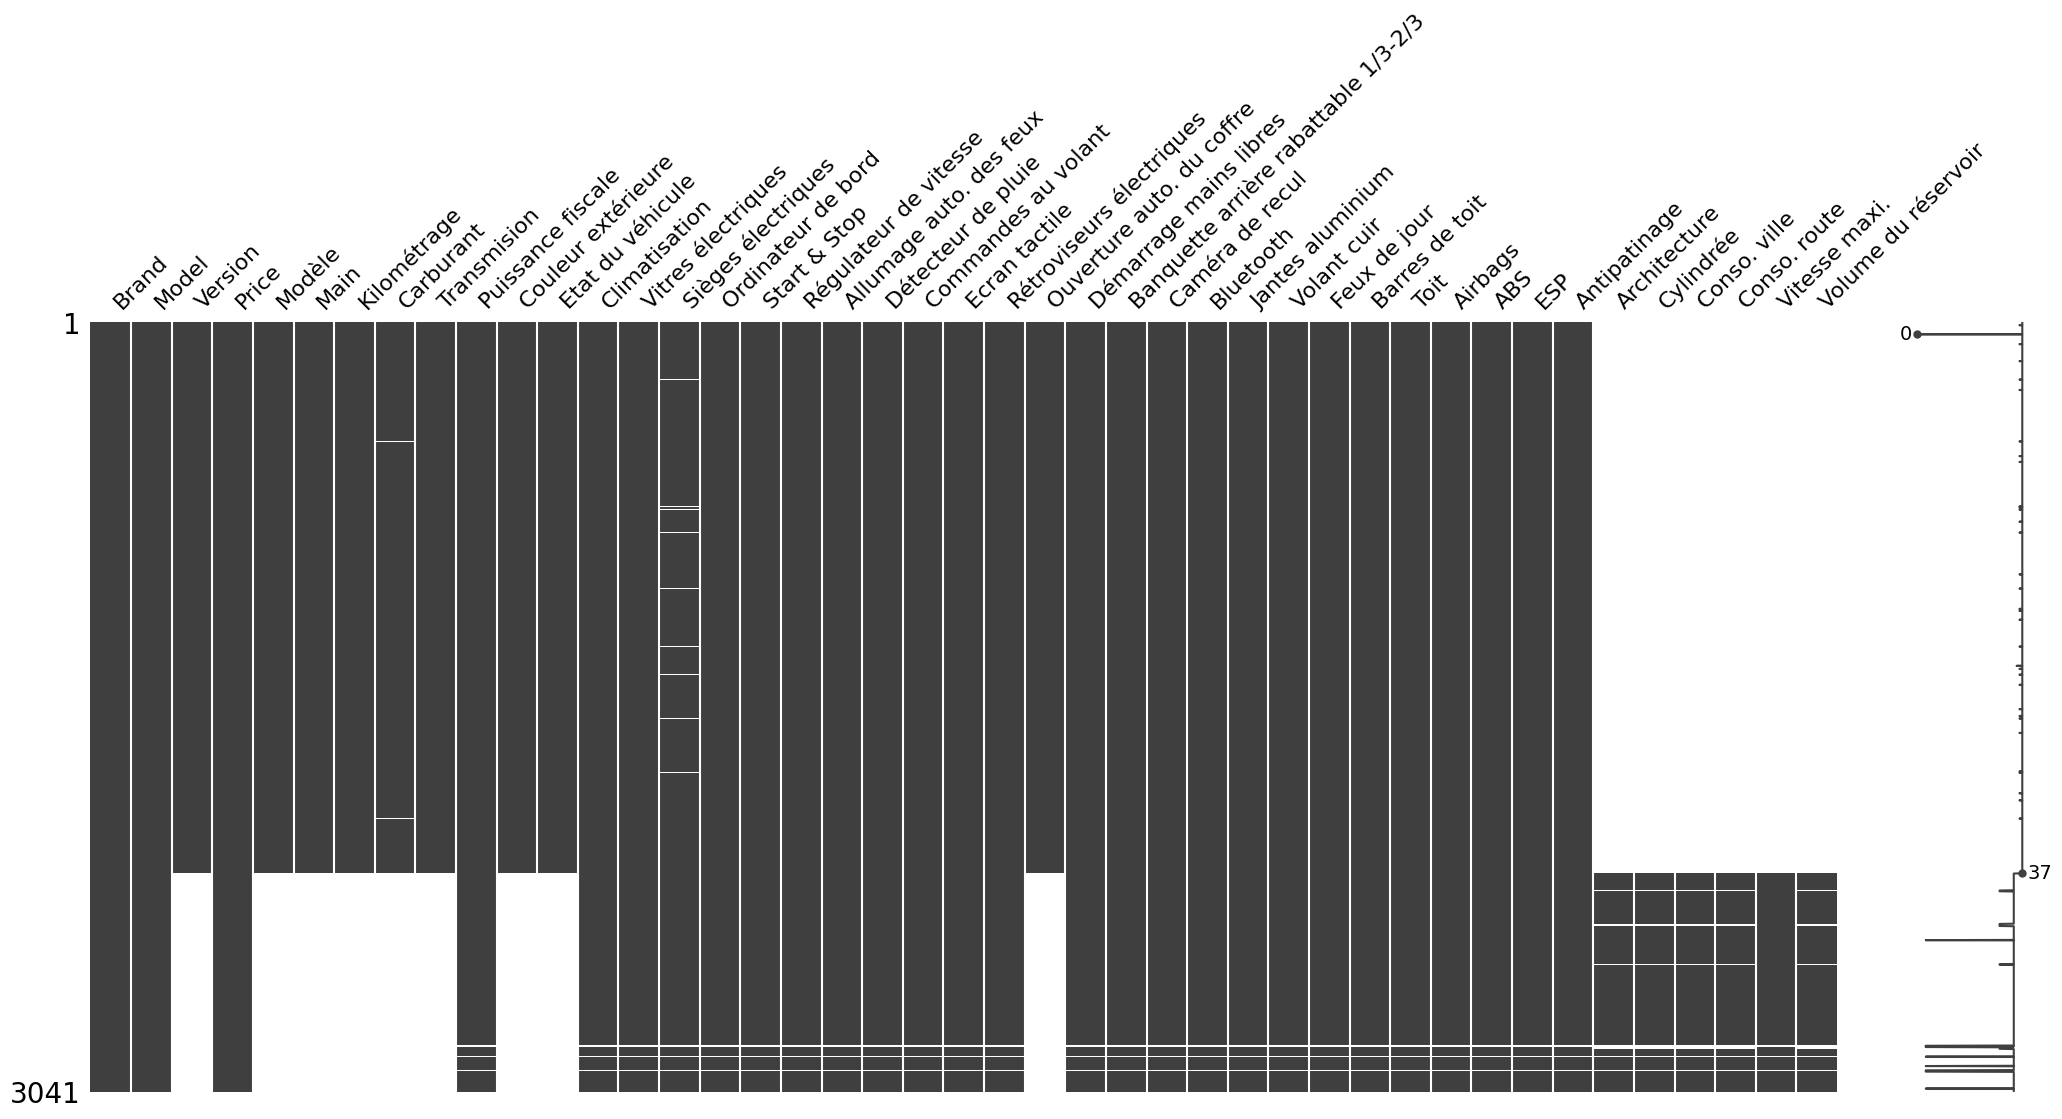

In [8]:
msno.matrix(df)
plt.show()

In [9]:
cols_to_drop = ['Architecture', 'Cylindrée', 'Conso. ville', 'Conso. route', 'Vitesse maxi.', 'Volume du réservoir', 'Modèle' ]
df = df.drop(cols_to_drop, axis=1)

In [11]:
df.isnull().sum()

Brand                                     1
Model                                     1
Version                                 865
Price                                     1
Main                                    865
Kilométrage                             865
Carburant                               879
Transmision                             865
Puissance fiscale                        16
Couleur extérieure                      865
Etat du véhicule                        865
Climatisation                            16
Vitres électriques                       16
Sièges électriques                       36
Ordinateur de bord                       16
Start & Stop                             16
Régulateur de vitesse                    16
Allumage auto. des feux                  16
Détecteur de pluie                       16
Commandes au volant                      16
Ecran tactile                            16
Rétroviseurs électriques                 16
Ouverture auto. du coffre       

In [12]:
index_null = df[df['Price'].isnull()].index.tolist()
index_null

[48]

In [13]:
index_null = df[df['Brand'].isnull()].index.tolist()
index_null

[48]

In [14]:
index_null = df[df['Model'].isnull()].index.tolist()
index_null

[48]

In [16]:
df = df.drop([48])

KeyError: '[48] not found in axis'

In [17]:
index_null = df[df['Puissance fiscale'].isnull()].index.tolist()
index_null

[2509,
 2943,
 2944,
 2945,
 2947,
 2948,
 2986,
 3023,
 3040,
 3041,
 3042,
 3043,
 3044,
 3045,
 3114]

In [18]:
df = df.drop([2509,
 2943,
 2944,
 2945,
 2947,
 2948,
 2986,
 3023,
 3040,
 3041,
 3042,
 3043,
 3044,
 3045,
 3114])

In [19]:
df.isnull().sum() 

Brand                                     0
Model                                     0
Version                                 849
Price                                     0
Main                                    849
Kilométrage                             849
Carburant                               863
Transmision                             849
Puissance fiscale                         0
Couleur extérieure                      849
Etat du véhicule                        849
Climatisation                             0
Vitres électriques                        0
Sièges électriques                       20
Ordinateur de bord                        0
Start & Stop                              0
Régulateur de vitesse                     0
Allumage auto. des feux                   0
Détecteur de pluie                        0
Commandes au volant                       0
Ecran tactile                             0
Rétroviseurs électriques                  0
Ouverture auto. du coffre       

In [20]:
df['Version'].fillna("Version non connue", inplace=True)

In [21]:
df['Price'] = df['Price'].str.strip("DH")
df['Price']

0                             228.000 
1                              79.000 
2                             150.000 
3                             135.000 
4                             240.000 
                     ...              
3124      630.000 DH *   * Prix public
3125      730.000 DH *   * Prix public
3126      850.000 DH *   * Prix public
3127    1.000.000 DH *   * Prix public
3128    1.100.000 DH *   * Prix public
Name: Price, Length: 3025, dtype: object

In [22]:
df["Price"] = df["Price"].replace("[^0-9\.]", "", regex=True)
df['Price']

0         228.000
1          79.000
2         150.000
3         135.000
4         240.000
          ...    
3124      630.000
3125      730.000
3126      850.000
3127    1.000.000
3128    1.100.000
Name: Price, Length: 3025, dtype: object

In [23]:
df["Price"] = df["Price"].str.replace(".", "")
df['Price']

C:\Users\ACER\AppData\Local\Temp\ipykernel_30620\884685823.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Price"] = df["Price"].str.replace(".", "")


0        228000
1         79000
2        150000
3        135000
4        240000
         ...   
3124     630000
3125     730000
3126     850000
3127    1000000
3128    1100000
Name: Price, Length: 3025, dtype: object

In [24]:
df["Price"] = df["Price"].astype(float)

In [25]:
imputer = IterativeImputer(estimator=LogisticRegression())
encoder = OneHotEncoder()
data_encoded = encoder.fit_transform(df[['Main']])
data_imputed = imputer.fit_transform(data_encoded.toarray())
df['Main'] = data_imputed

In [26]:
df['Kilométrage']= df['Kilométrage'].str.strip('Km')
df['Kilométrage']

0       144.500 k
1       350.000 k
2       144.000 k
3       248.000 k
4       103.000 k
          ...    
3124          NaN
3125          NaN
3126          NaN
3127          NaN
3128          NaN
Name: Kilométrage, Length: 3025, dtype: object

In [27]:
df['Kilométrage']= df['Kilométrage'].str.strip('k')
df['Kilométrage'].value_counts()

200.000     46
150.000     44
100.000     39
140.000     36
300.000     31
            ..
44.300       1
198.900      1
81.985       1
89.500       1
100.100      1
Name: Kilométrage, Length: 632, dtype: int64

In [28]:
df['Kilométrage'].dtypes

dtype('O')

In [29]:
df["Kilométrage"] = df["Kilométrage"].str.replace(".", "")
df["Kilométrage"]= df["Kilométrage"].astype('float')
df['Kilométrage']

C:\Users\ACER\AppData\Local\Temp\ipykernel_30620\3624037077.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Kilométrage"] = df["Kilométrage"].str.replace(".", "")


0       144500.0
1       350000.0
2       144000.0
3       248000.0
4       103000.0
          ...   
3124         NaN
3125         NaN
3126         NaN
3127         NaN
3128         NaN
Name: Kilométrage, Length: 3025, dtype: float64

In [30]:
imputer = IterativeImputer(estimator=LogisticRegression())
df['Kilométrage'] = imputer.fit_transform(df[['Kilométrage']])

In [31]:
df['Carburant'].fillna('Unknown', inplace=True)

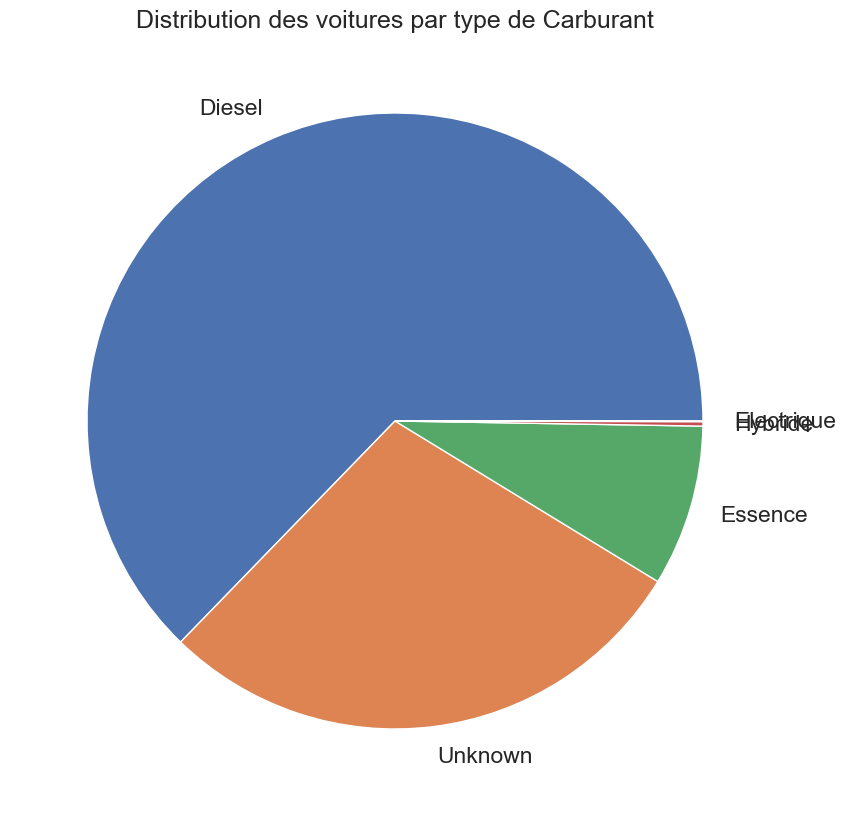

In [32]:
sns.set(style="ticks", font_scale=1.5, rc={"figure.figsize":(10, 30)})
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Carburant.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Distribution des voitures par type de Carburant")
plt.show()

In [33]:
df['Transmision'].fillna('Unknown', inplace=True)

In [34]:
df['Puissance fiscale'] = df['Puissance fiscale'].str.strip("cv")
df['Puissance fiscale'].value_counts()

6      953
8      860
-      293
7      238
9      158
12     146
11     120
5       61
10      34
17      33
25      14
14      12
13      11
15      10
21      10
29       8
20       7
-        7
22       6
18       6
4        5
06       5
19       4
23       3
70       2
         2
24       2
81       1
37       1
08       1
3        1
95       1
75       1
2        1
26       1
85       1
47       1
1        1
16       1
07       1
73       1
27       1
Name: Puissance fiscale, dtype: int64

In [35]:
df["Puissance fiscale"] = df["Puissance fiscale"].str.replace("-", "0")

In [36]:
index1 = df['Puissance fiscale'].index[df['Puissance fiscale'] == ''][0]

In [37]:
index1

2607

In [38]:
df.at[2607, 'Puissance fiscale'] = '0'

In [39]:
index2 = df['Puissance fiscale'].index[df['Puissance fiscale'] == ''][0]

In [40]:
index2

2608

In [41]:
df.at[2608, 'Puissance fiscale'] = '0'

In [43]:
df['Puissance fiscale'] = df['Puissance fiscale'].astype('float')

In [44]:
df['Puissance fiscale'] = df['Puissance fiscale'].replace(0,df['Puissance fiscale'].mean())

In [45]:
df['Couleur extérieure'].fillna('Unknown', inplace=True)

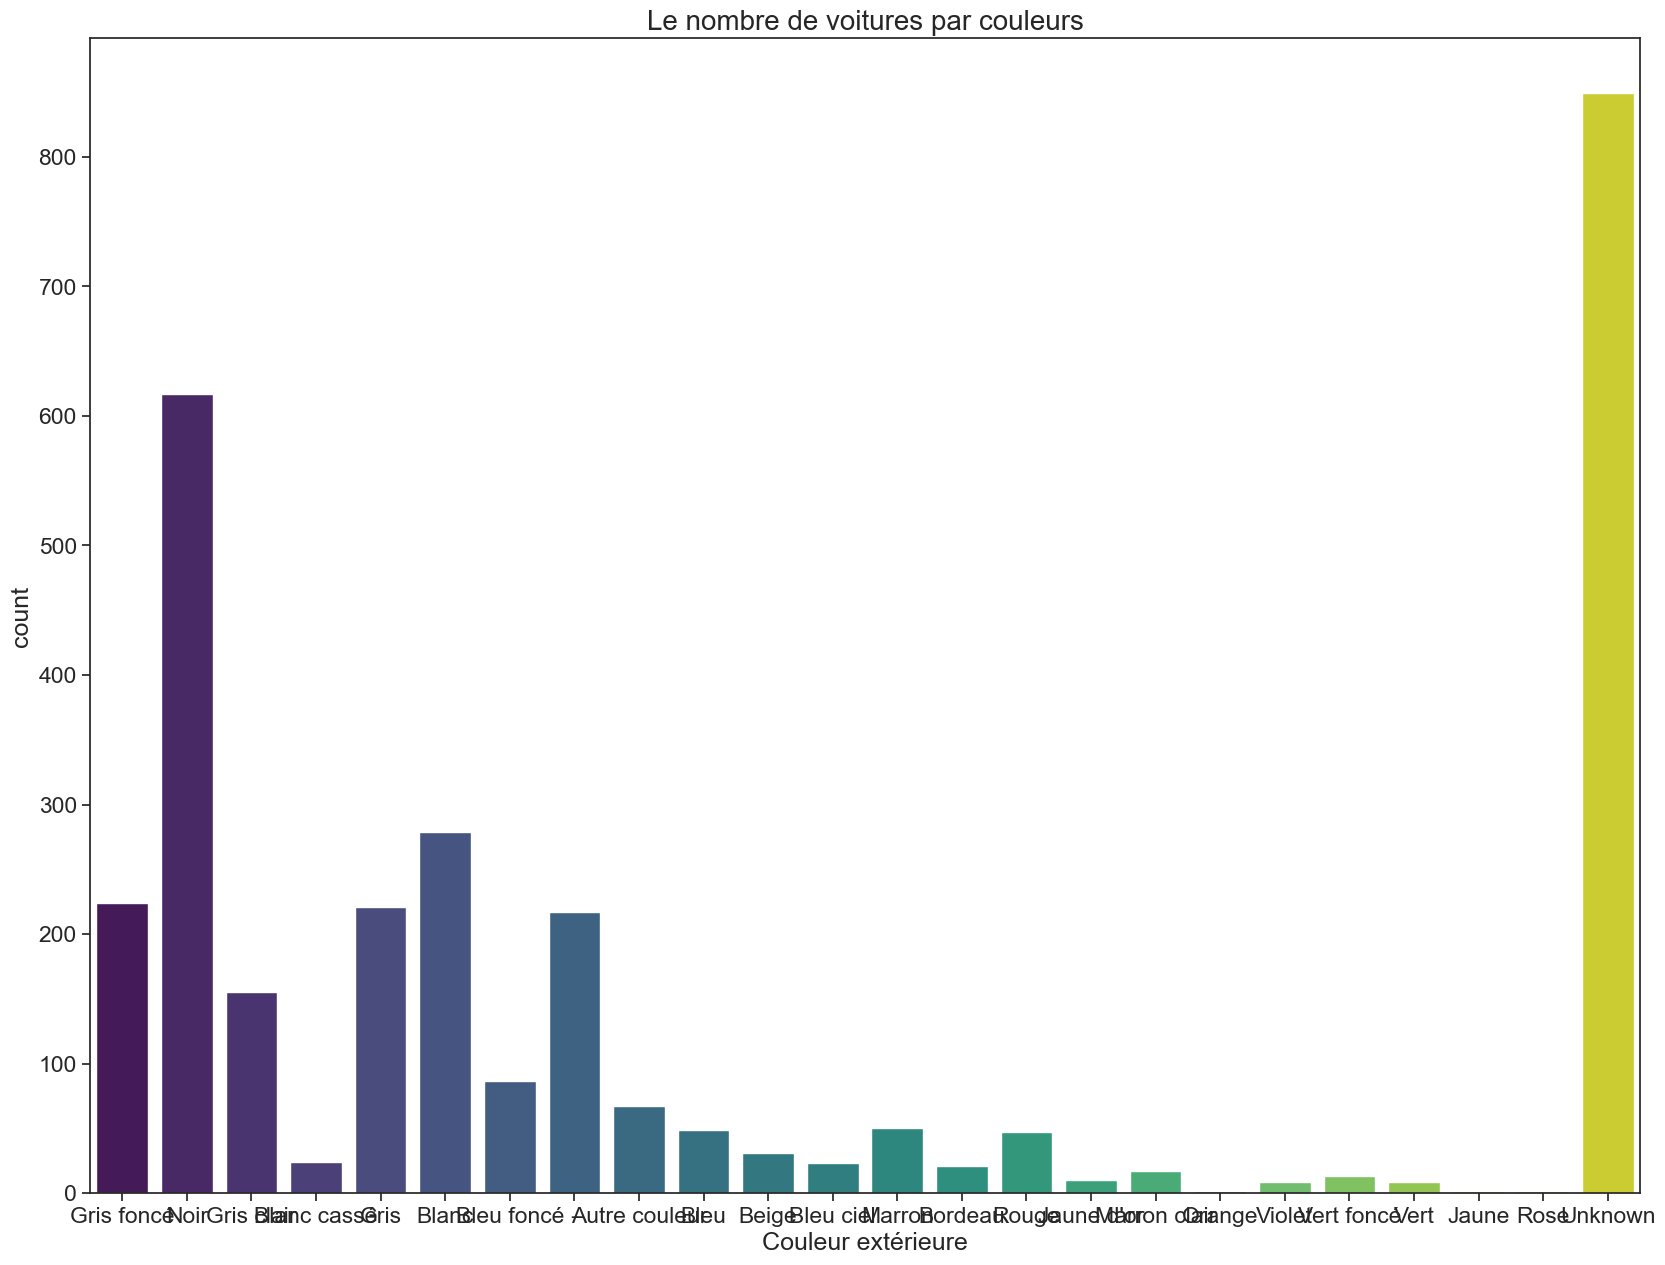

In [46]:
#sns.set(style="ticks", font_scale=1.5, rc={"figure.figsize":(200, 200)})
plt.figure(figsize = (20, 15))
sns.countplot(x="Couleur extérieure", data=df,palette = 'viridis')
#sns.countplot(df['Couleur extérieure'], palette = 'viridis')
plt.title("Le nombre de voitures par couleurs", fontsize = 20)
plt.show()

In [47]:
df['Etat du véhicule'].value_counts()

Excellent      738
Très bon       549
Comme neuve    519
-              219
Bon            132
Correct         19
Name: Etat du véhicule, dtype: int64

In [48]:
df['Etat du véhicule'] = df['Etat du véhicule'].replace('-','Unknown')
df['Etat du véhicule'].fillna('Unknown', inplace=True)

<AxesSubplot: xlabel='Etat du véhicule', ylabel='count'>

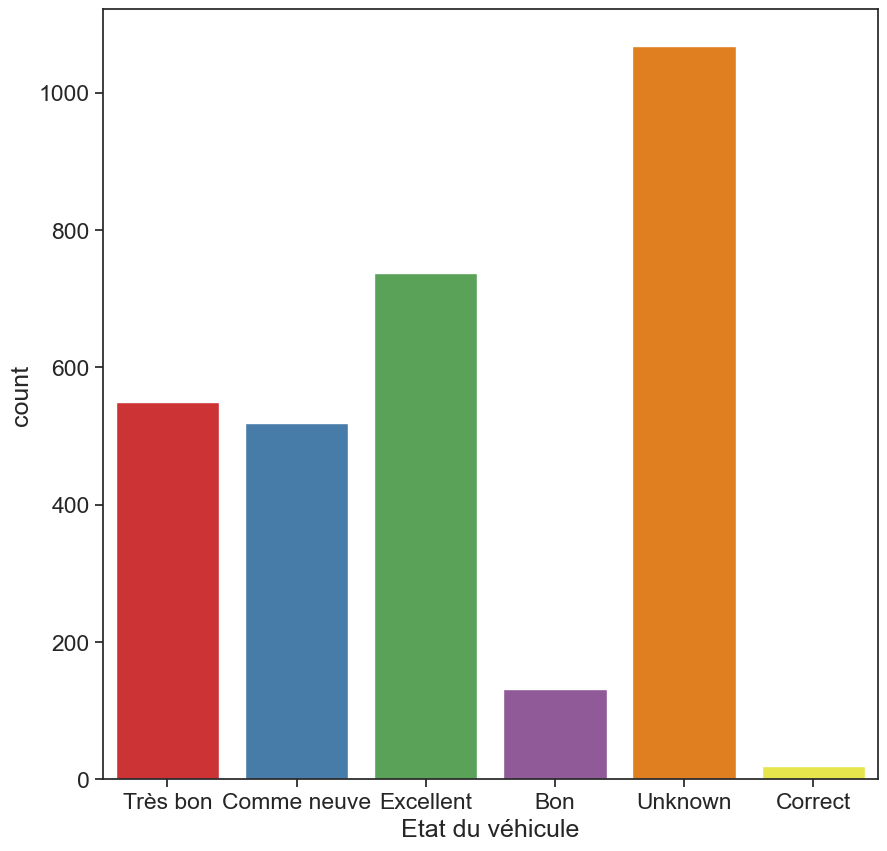

In [49]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'Etat du véhicule', data = df, palette = 'Set1')

In [50]:
df['Climatisation'].value_counts()

auto. Bi-zone        929
manuelle             926
auto.                510
non                  406
auto. Tri-zone       141
auto. Multi-zone      59
auto. Quadri-zone     53
تلقاءي.                1
Name: Climatisation, dtype: int64

In [51]:
df['Climatisation'] = df['Climatisation'].replace('تلقاءي.','auto.') 
df['Climatisation'] = df['Climatisation'].replace('non','non connue')  

In [52]:
df['Climatisation'].value_counts()

auto. Bi-zone        929
manuelle             926
auto.                511
non connue           406
auto. Tri-zone       141
auto. Multi-zone      59
auto. Quadri-zone     53
Name: Climatisation, dtype: int64

In [53]:
df['Vitres électriques'].value_counts()

Electrique AV/AR    1918
Electrique AV        655
-                    441
non                    8
Electrique AR          3
Name: Vitres électriques, dtype: int64

In [54]:
df['Vitres électriques'] = df['Vitres électriques'].replace('non','pas de vitres électriques')
df['Vitres électriques'] = df['Vitres électriques'].replace('-','Unknown') 

In [55]:
df['Vitres électriques'].value_counts()

Electrique AV/AR             1918
Electrique AV                 655
Unknown                       441
pas de vitres électriques       8
Electrique AR                   3
Name: Vitres électriques, dtype: int64

In [56]:
df['Sièges électriques'].value_counts()

non                       1993
Conducteur et Passager     584
Conducteur                 340
Tous les passagers          76
Passager                    12
Name: Sièges électriques, dtype: int64

In [57]:
df['Sièges électriques'].fillna('Unknown', inplace=True)
df['Sièges électriques'] = df['Vitres électriques'].replace('non','pas de sièges')

In [58]:
df['Sièges électriques'].value_counts()

Electrique AV/AR             1918
Electrique AV                 655
Unknown                       441
pas de vitres électriques       8
Electrique AR                   3
Name: Sièges électriques, dtype: int64

In [60]:
df['Ordinateur de bord'].value_counts()

oui    2173
non     852
Name: Ordinateur de bord, dtype: int64

In [61]:
df["Ordinateur de bord"] = df["Ordinateur de bord"].map({"oui": 1, "non": 0})

In [62]:
df['Start & Stop'].value_counts()

non    1769
oui    1256
Name: Start & Stop, dtype: int64

In [63]:
df["Start & Stop"] = df["Start & Stop"].map({"oui": 1, "non": 0})

In [64]:
df['Régulateur de vitesse'].value_counts()

oui    2167
non     858
Name: Régulateur de vitesse, dtype: int64

In [65]:
df["Régulateur de vitesse"] = df["Régulateur de vitesse"].map({"oui": 1, "non": 0})

In [66]:
df['Allumage auto. des feux'].value_counts()

oui    1724
non    1301
Name: Allumage auto. des feux, dtype: int64

In [67]:
df["Allumage auto. des feux"] = df["Allumage auto. des feux"].map({"oui": 1, "non": 0})

In [68]:
df['Détecteur de pluie'].value_counts()

oui    1573
non    1452
Name: Détecteur de pluie, dtype: int64

In [69]:
df["Détecteur de pluie"] = df["Détecteur de pluie"].map({"oui": 1, "non": 0})

In [70]:
df['Commandes au volant'].value_counts()

oui    2113
non     912
Name: Commandes au volant, dtype: int64

In [71]:
df["Commandes au volant"] = df["Commandes au volant"].map({"oui": 1, "non": 0})

In [72]:
df['Ecran tactile'].value_counts()

oui    1643
non    1382
Name: Ecran tactile, dtype: int64

In [73]:
df["Ecran tactile"] = df["Ecran tactile"].map({"oui": 1, "non": 0})

In [74]:
df['Rétroviseurs électriques'].value_counts()

oui    2120
non     905
Name: Rétroviseurs électriques, dtype: int64

In [75]:
df["Rétroviseurs électriques"] = df["Rétroviseurs électriques"].map({"oui": 1, "non": 0})

In [76]:
mode_imputer = SimpleImputer(strategy='most_frequent')
data_imputed = mode_imputer.fit_transform(df[['Ouverture auto. du coffre']])
df['Ouverture auto. du coffre'] = data_imputed

In [77]:
df['Ouverture auto. du coffre'].value_counts()

non    2619
oui     406
Name: Ouverture auto. du coffre, dtype: int64

In [78]:
df["Ouverture auto. du coffre"] = df["Ouverture auto. du coffre"].map({"oui": 1, "non": 0})

In [79]:
df['Démarrage mains libres'].value_counts()

non    1659
oui    1366
Name: Démarrage mains libres, dtype: int64

In [80]:
df["Démarrage mains libres"] = df["Démarrage mains libres"].map({"oui": 1, "non": 0})

In [81]:
df['Banquette arrière rabattable 1/3-2/3'].value_counts()

oui    1637
non    1388
Name: Banquette arrière rabattable 1/3-2/3, dtype: int64

In [82]:
df["Banquette arrière rabattable 1/3-2/3"] = df["Banquette arrière rabattable 1/3-2/3"].map({"oui": 1, "non": 0})

In [83]:
df['Caméra de recul'].value_counts()

non    1700
oui    1325
Name: Caméra de recul, dtype: int64

In [84]:
df["Caméra de recul"] = df["Caméra de recul"].map({"oui": 1, "non": 0})

In [85]:
df['Bluetooth'].value_counts()

oui    2097
non     928
Name: Bluetooth, dtype: int64

In [86]:
df["Bluetooth"] = df["Bluetooth"].map({"oui": 1, "non": 0})

In [87]:
df['Jantes aluminium'].value_counts()

oui          1426
non           836
18 pouces     193
17 pouces     186
19 pouces     147
16 pouces     107
20 pouces      73
21 pouces      24
15 pouces      21
14 pouces       7
22 pouces       5
Name: Jantes aluminium, dtype: int64

In [88]:
df["Jantes aluminium"] = df["Jantes aluminium"].str.replace("18 pouces", "oui")
df["Jantes aluminium"] = df["Jantes aluminium"].str.replace("17 pouces", "oui")
df["Jantes aluminium"] = df["Jantes aluminium"].str.replace("19 pouces", "oui")
df["Jantes aluminium"] = df["Jantes aluminium"].str.replace("16 pouces", "oui")
df["Jantes aluminium"] = df["Jantes aluminium"].str.replace("20 pouces", "oui")
df["Jantes aluminium"] = df["Jantes aluminium"].str.replace("21 pouces", "oui")
df["Jantes aluminium"] = df["Jantes aluminium"].str.replace("15 pouces", "oui")
df["Jantes aluminium"] = df["Jantes aluminium"].str.replace("14 pouces", "oui")
df["Jantes aluminium"] = df["Jantes aluminium"].str.replace("22 pouces", "oui")

In [89]:
df['Jantes aluminium'].value_counts()

oui    2189
non     836
Name: Jantes aluminium, dtype: int64

In [90]:
df["Jantes aluminium"] = df["Jantes aluminium"].map({"oui": 1, "non": 0})

In [91]:
df['Volant cuir'].value_counts()

non    1825
oui    1200
Name: Volant cuir, dtype: int64

In [92]:
df["Volant cuir"] = df["Volant cuir"].map({"oui": 1, "non": 0})

In [93]:
df['Feux de jour'].value_counts()

oui    1850
non    1175
Name: Feux de jour, dtype: int64

In [94]:
df["Feux de jour"] = df["Feux de jour"].map({"oui": 1, "non": 0})

In [95]:
df['Barres de toit'].value_counts()

non    2307
oui     718
Name: Barres de toit, dtype: int64

In [96]:
df["Barres de toit"] = df["Barres de toit"].map({"oui": 1, "non": 0})

In [97]:
df['Toit'].value_counts()

Rigide                 2381
Panoramique ouvrant     354
Panoramique             197
Ouvrant                  93
Name: Toit, dtype: int64

In [99]:
df['Airbags'].value_counts()

oui     1919
6.0      286
non      257
8.0      181
7.0      159
2.0      116
4.0       51
9.0       24
10.0      23
0.0        7
1.0        2
Name: Airbags, dtype: int64

In [100]:
df["Airbags"] = df["Airbags"].map({"oui": 1, "non": 0,"6.0": 1, "8.0": 1,"7.0": 1, "2.0": 1,"4.0": 1, "9.0": 1,"10.0": 1, "1.0": 1, "0.0": 0})

In [101]:
df['ABS'].value_counts()

oui    2683
non     342
Name: ABS, dtype: int64

In [102]:
df["ABS"] = df["ABS"].map({"oui": 1, "non": 0})

In [103]:
df['ESP'].value_counts()

oui    2214
non     811
Name: ESP, dtype: int64

In [104]:
df["ESP"] = df["ESP"].map({"oui": 1, "non": 0})

In [105]:
df['Antipatinage'].value_counts()

oui    2073
non     952
Name: Antipatinage, dtype: int64

In [106]:
df["Antipatinage"] = df["Antipatinage"].map({"oui": 1, "non": 0})

In [107]:
df.isnull().sum()

Brand                                   0
Model                                   0
Version                                 0
Price                                   0
Main                                    0
Kilométrage                             0
Carburant                               0
Transmision                             0
Puissance fiscale                       0
Couleur extérieure                      0
Etat du véhicule                        0
Climatisation                           0
Vitres électriques                      0
Sièges électriques                      0
Ordinateur de bord                      0
Start & Stop                            0
Régulateur de vitesse                   0
Allumage auto. des feux                 0
Détecteur de pluie                      0
Commandes au volant                     0
Ecran tactile                           0
Rétroviseurs électriques                0
Ouverture auto. du coffre               0
Démarrage mains libres            

In [108]:
df

,Brand,Model,Version,Price,Main,Kilométrage,Carburant,Transmision,Puissance fiscale,Couleur extérieure,...,Bluetooth,Jantes aluminium,Volant cuir,Feux de jour,Barres de toit,Toit,Airbags,ABS,ESP,Antipatinage
0,MERCEDES,Classe C 2014,220 d,228000.0,0.0,144500.000000,Diesel,Automatique,8.0,Gris foncé,...,1,1,1,1,0,Rigide,1,1,1,1
1,MERCEDES,Classe C 2003,220 CDI,79000.0,0.0,350000.000000,Diesel,Manuelle,8.0,Noir,...,1,1,0,1,0,Rigide,1,1,1,1
2,MERCEDES,Classe B 2013,180 d Urban,150000.0,0.0,144000.000000,Diesel,Manuelle,8.0,Noir,...,1,1,1,1,0,Rigide,1,1,1,1
3,MERCEDES,Classe E 2006,Autre version,135000.0,0.0,248000.000000,Diesel,Automatique,9.0,Gris clair,...,1,1,0,1,1,Rigide,1,1,1,1
4,MERCEDES,CLA Coupé 2014,220 CDI,240000.0,0.0,103000.000000,Diesel,Automatique,9.0,Blanc cassé,...,1,1,0,1,0,Panoramique,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,VOLVO,XC90,Version non connue,630000.0,0.0,148795.883732,Unknown,Unknown,8.0,Unknown,...,1,1,1,1,1,Rigide,1,1,1,1
3125,VOLVO,XC90,Version non connue,730000.0,0.0,148795.883732,Unknown,Unknown,8.0,Unknown,...,1,1,1,1,1,Panoramique ouvrant,1,1,1,1
3126,VOLVO,XC90,Version non connue,850000.0,0.0,148795.883732,Unknown,Unknown,8.0,Unknown,...,1,1,1,1,1,Panoramique ouvrant,1,1,1,1
3127,VOLVO,XC90,Version non connue,1000000.0,0.0,148795.883732,Unknown,Unknown,11.0,Unknown,...,1,1,1,1,1,Panoramique ouvrant,1,1,1,1


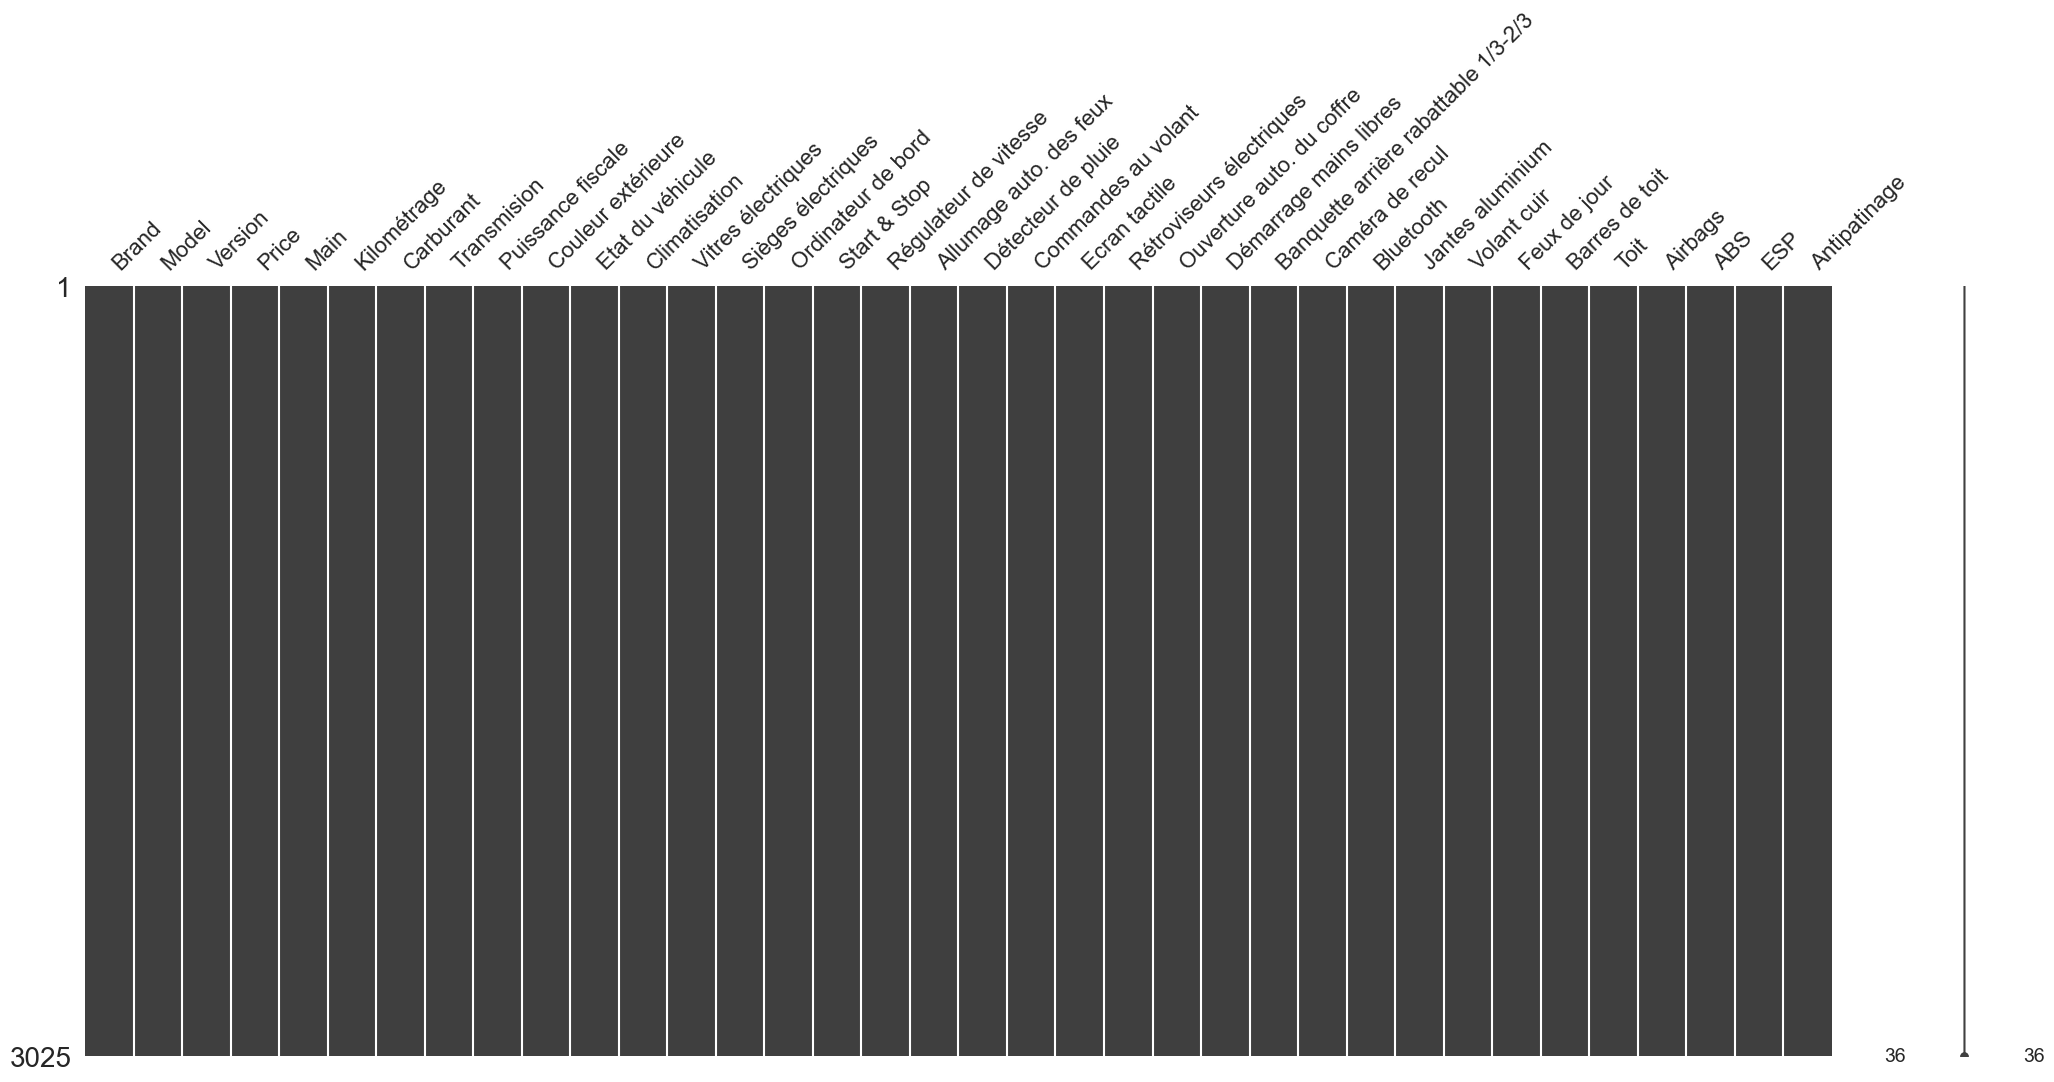

In [109]:
msno.matrix(df)
plt.show()

# Visualisation

In [110]:
correlation_matrix = df.corr()

C:\Users\ACER\AppData\Local\Temp\ipykernel_30620\4214245630.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Text(0.5, 1.0, 'Matrice de corrélation')

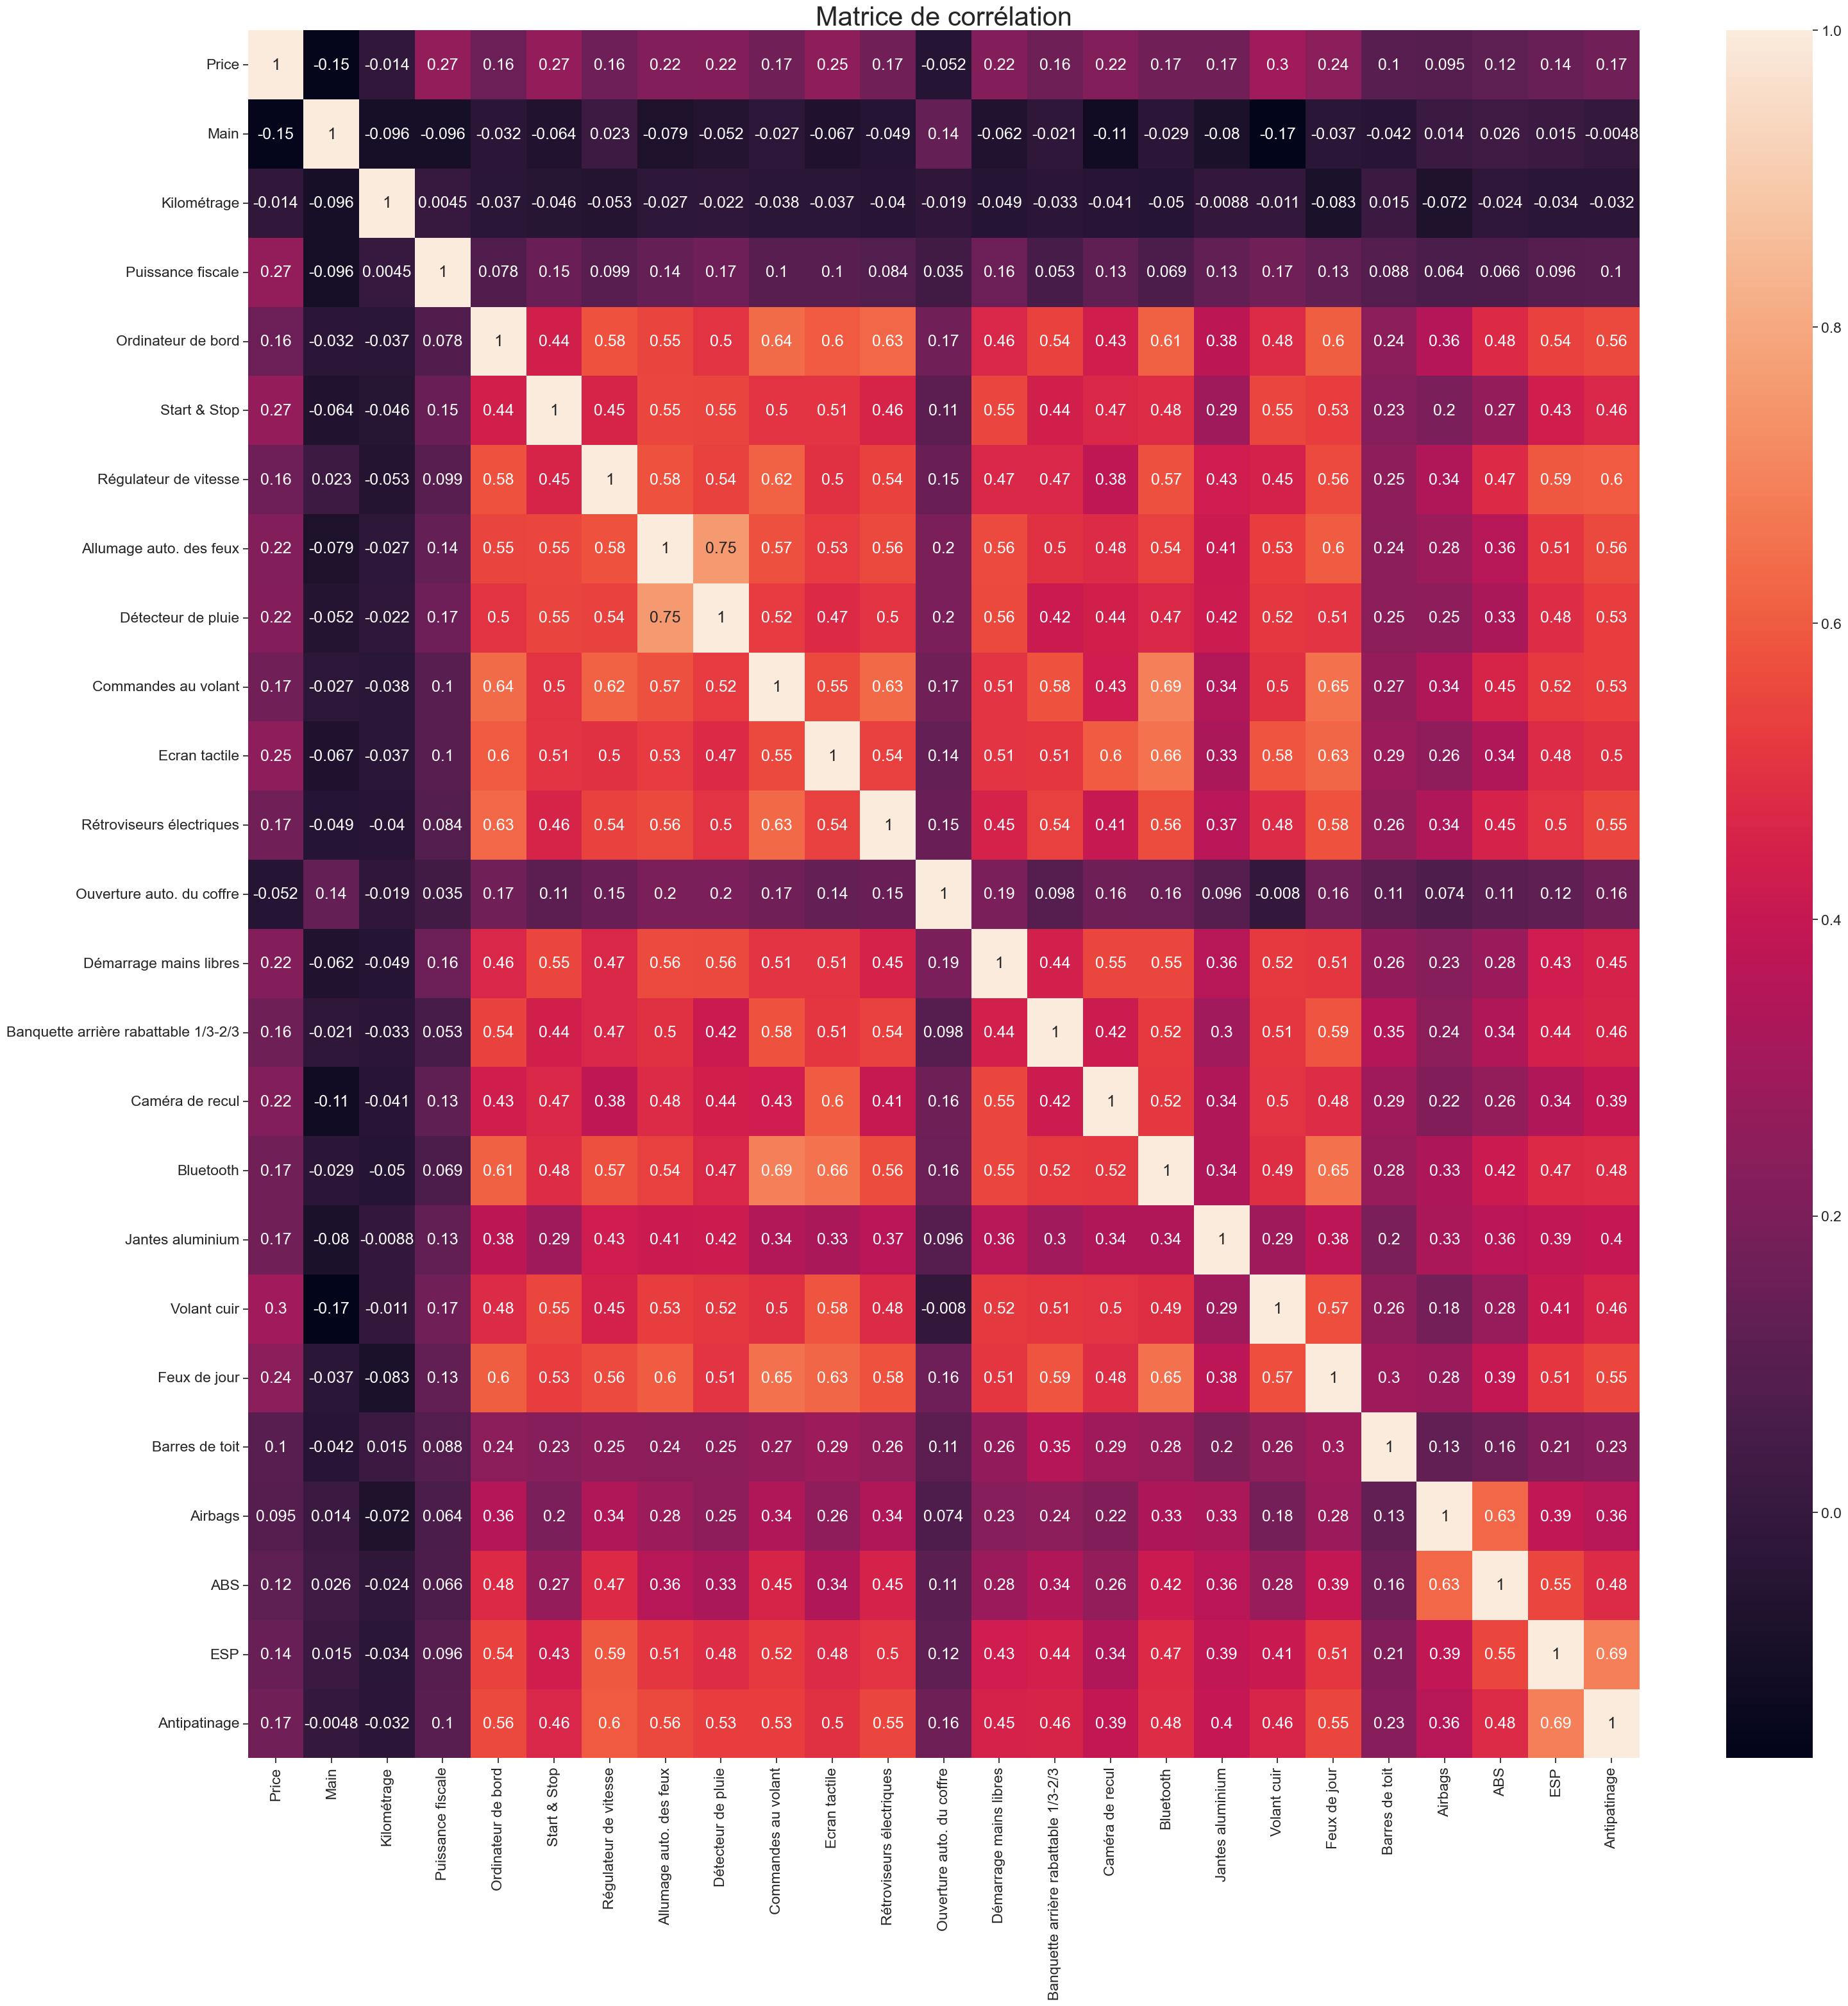

In [112]:
plt.figure(figsize = (35, 35))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matrice de corrélation', fontsize = 30)

In [113]:
df_sample = df.sample(n=1000)

Text(0.5, 1.0, 'Le prix en fonction de la marque de la voiture')

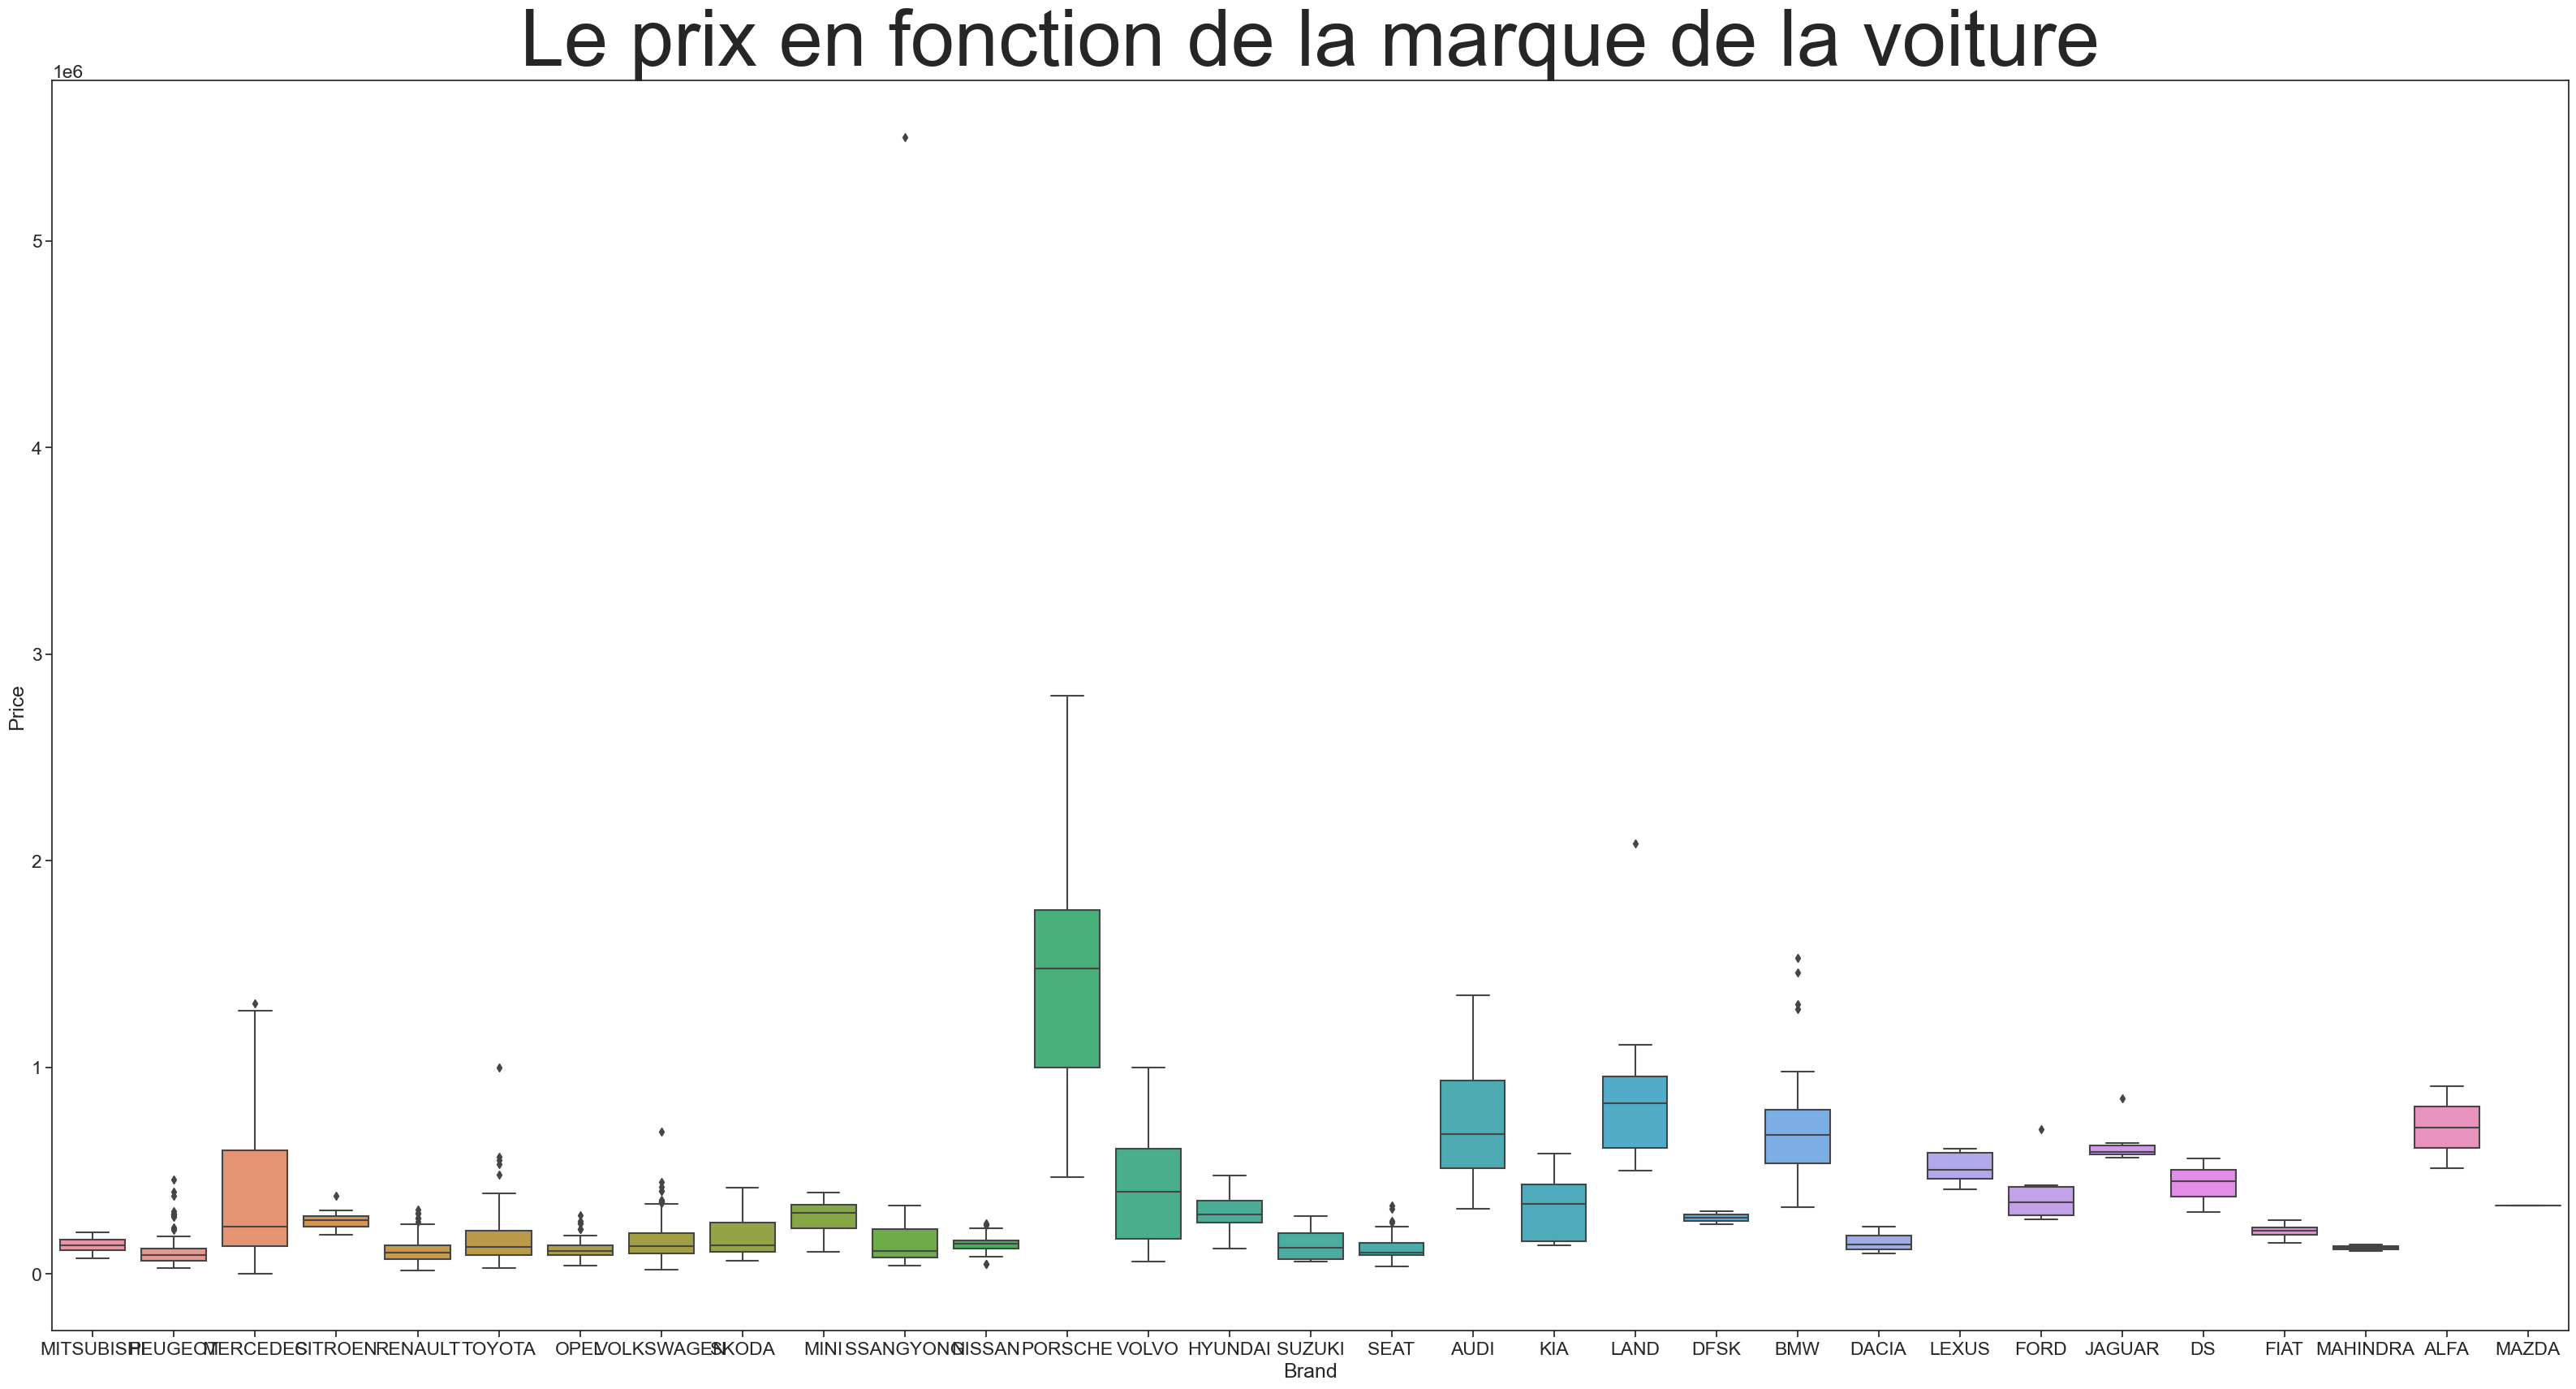

In [114]:
sns.set(style="ticks", font_scale=1.5, rc={"figure.figsize":(40, 20)})
sns.boxplot(x="Brand", y="Price", data=df_sample)
plt.title('Le prix en fonction de la marque de la voiture', fontsize = 70)

Text(0.5, 1.0, 'Les prix du marché')

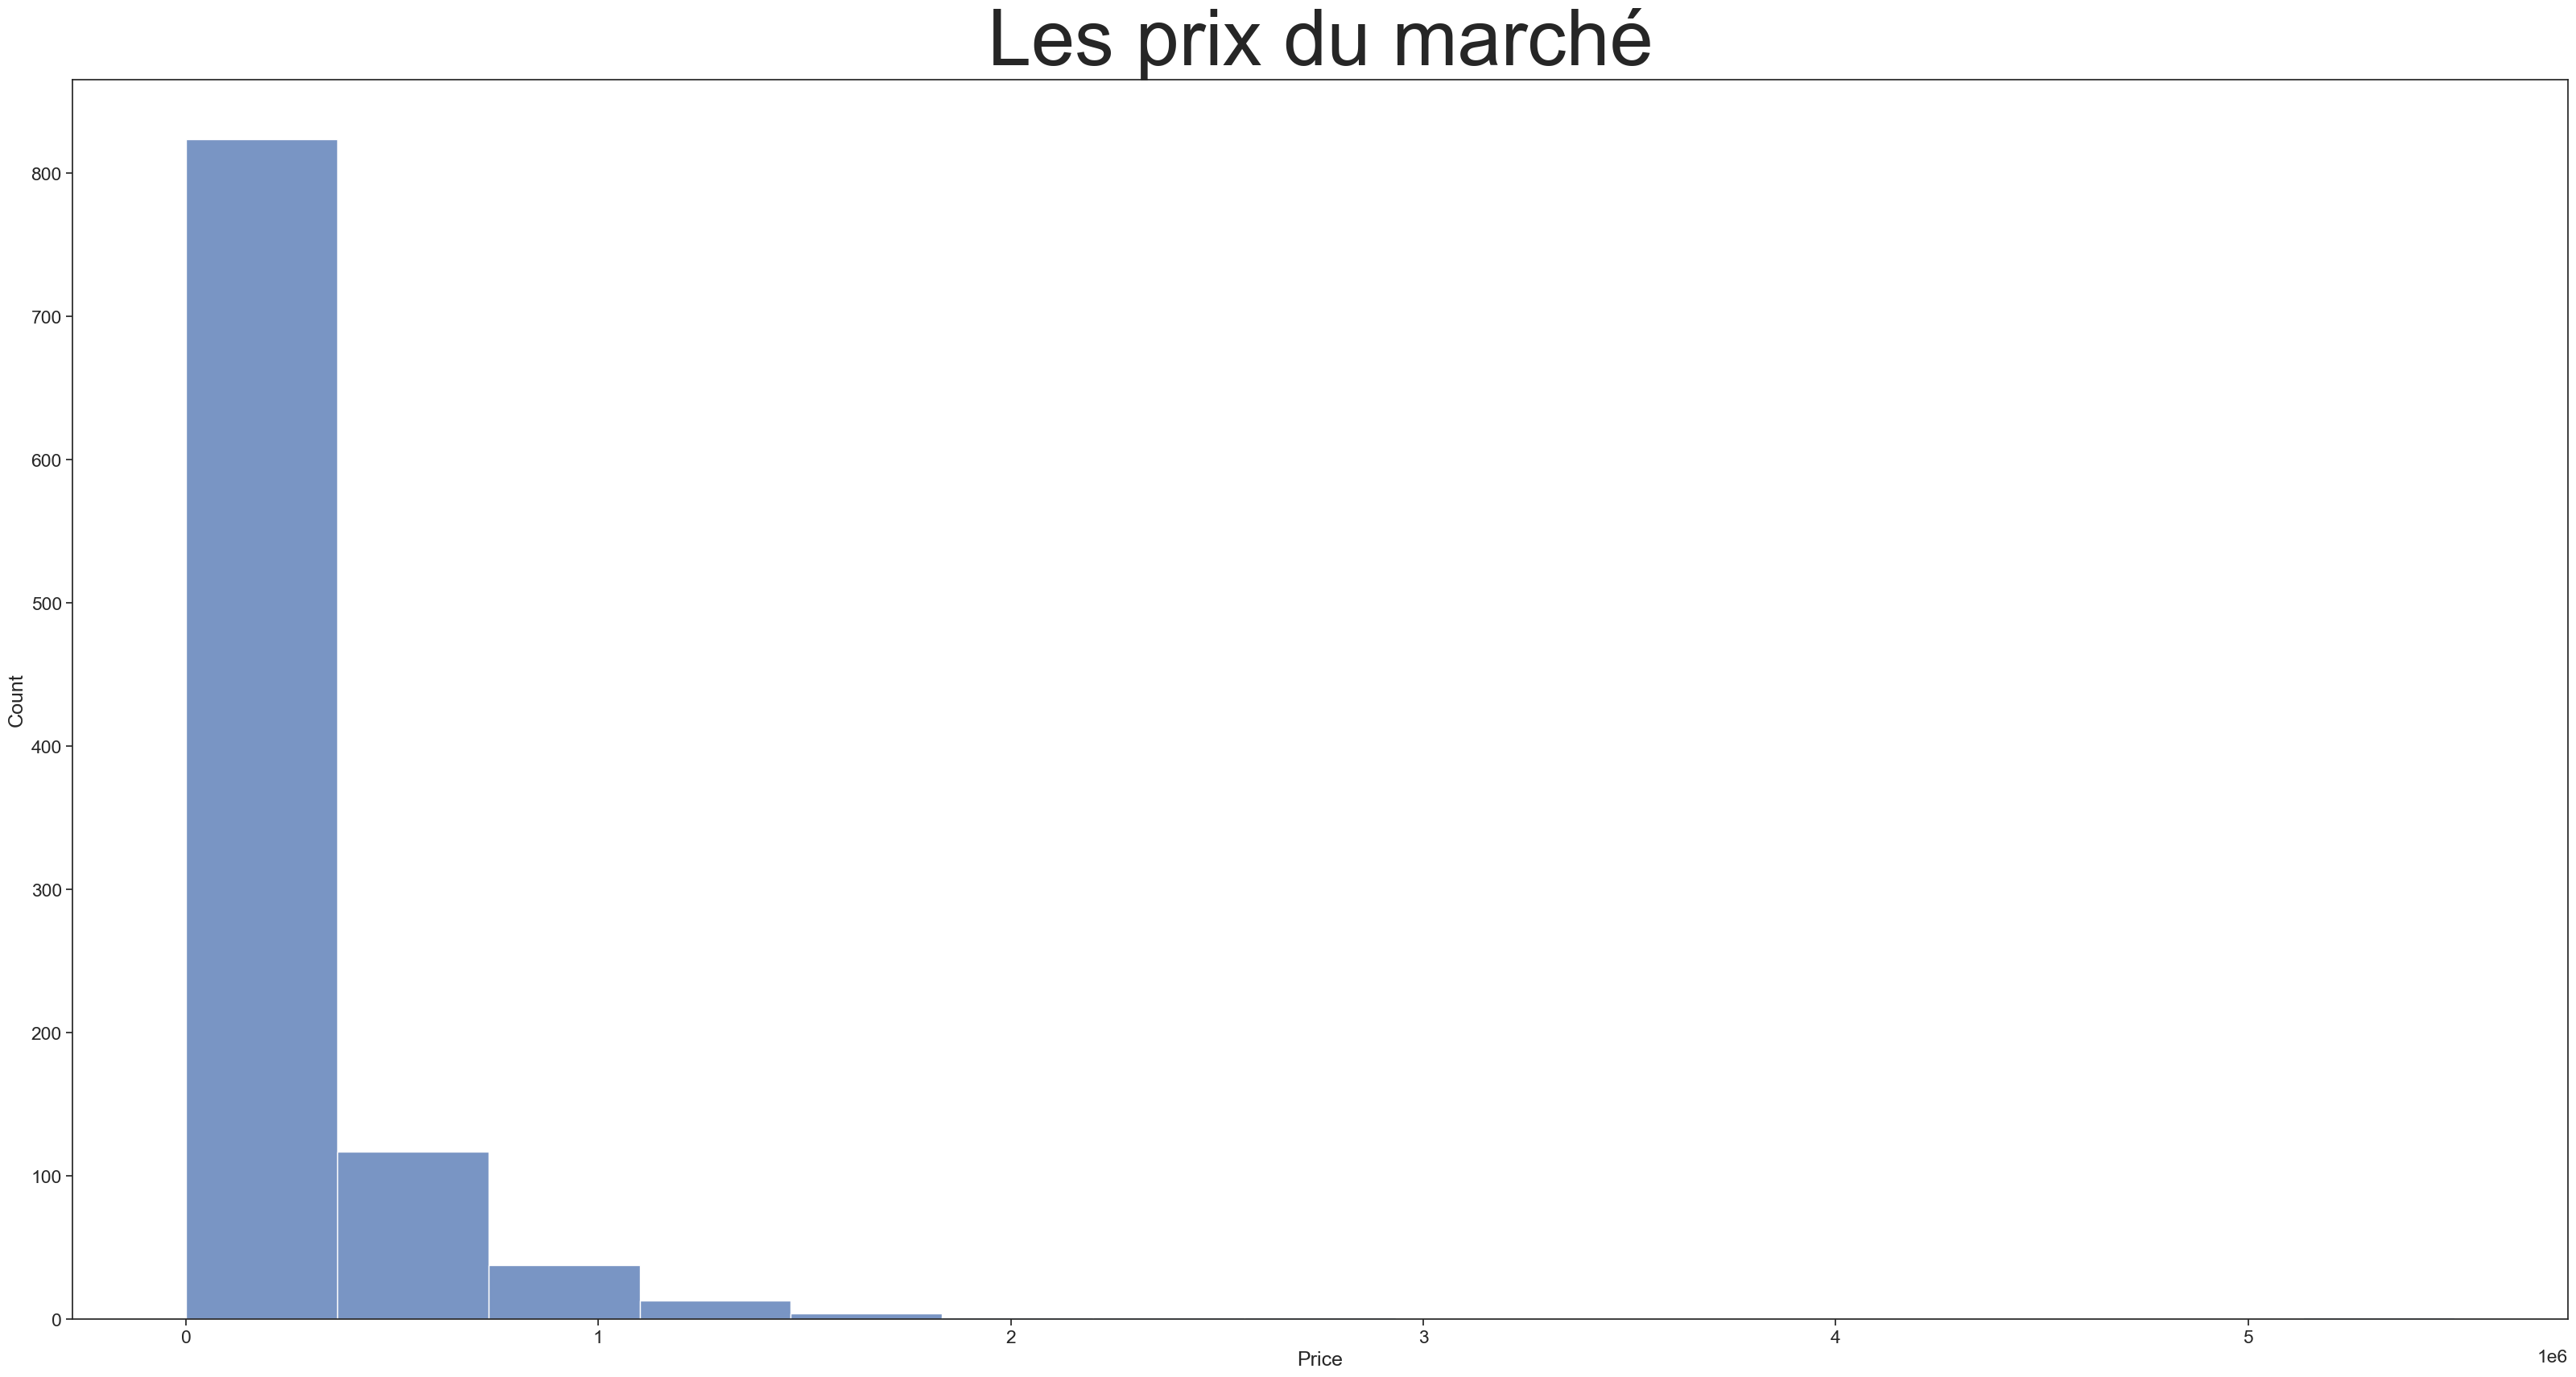

In [115]:
sns.histplot(df_sample, x='Price', bins=15)
plt.title('Les prix du marché', fontsize = 70)

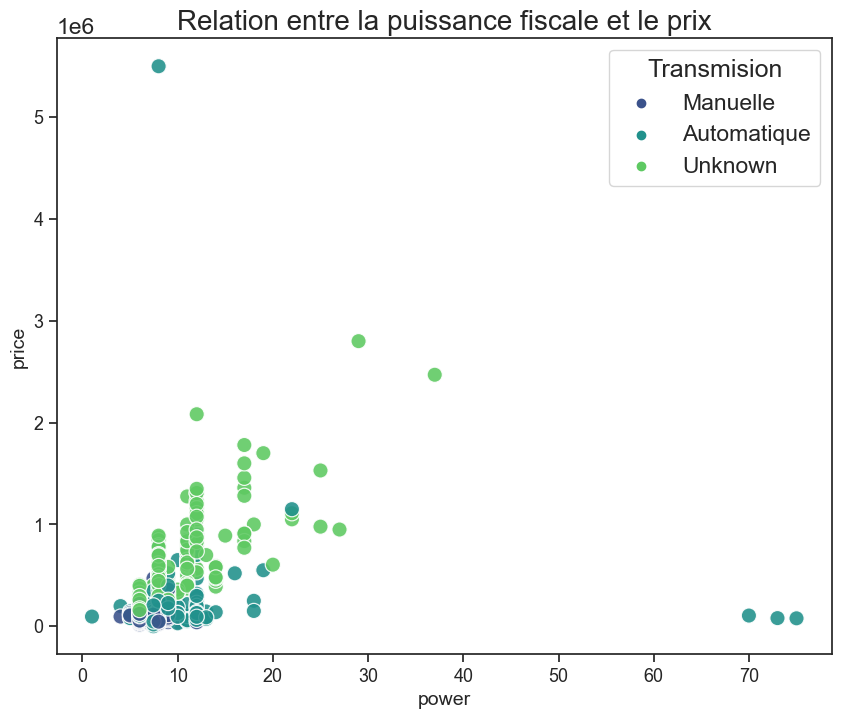

In [116]:
plt.figure(figsize=(10,8)) 
sns.scatterplot(data=df_sample, x='Puissance fiscale', y='Price',hue='Transmision',palette='viridis',alpha=.89 , s=120 ); 
plt.xticks(fontsize=13); 
plt.yticks(fontsize=13) 
plt.xlabel('power',fontsize=14) 
plt.ylabel('price',fontsize=14) 
plt.title('Relation entre la puissance fiscale et le prix',fontsize=20);

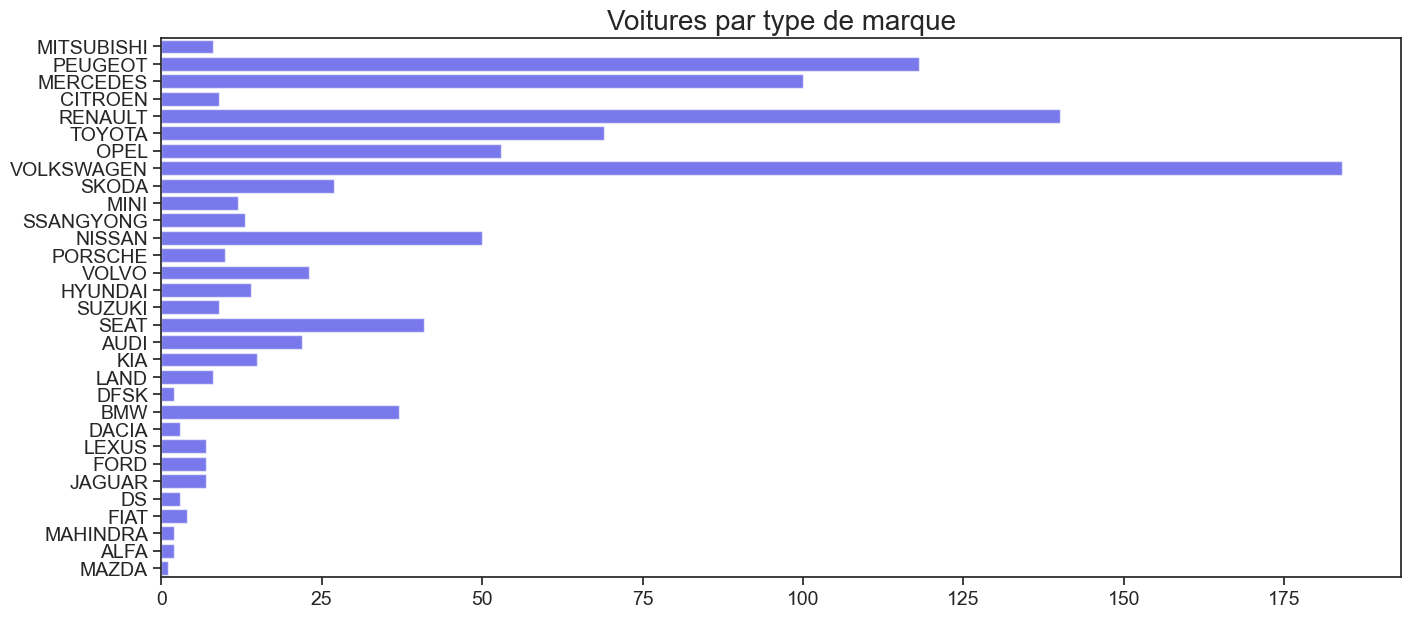

In [117]:
plt.figure(figsize=(16,7)) 
sns.countplot(data=df_sample, y='Brand',alpha=.6,color='blue') 
plt.title('Voitures par type de marque',fontsize =20) 
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 
plt.xlabel('') 
plt.ylabel('');

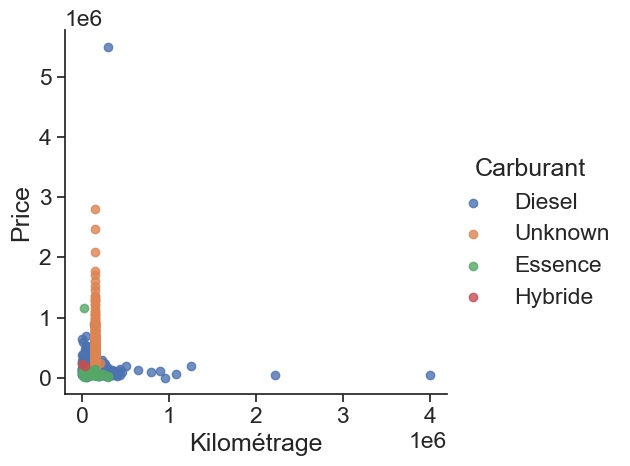

In [118]:
sns.set(style="ticks", font_scale=1.5, rc={"figure.figsize":(40, 20)})
sns.lmplot(data=df_sample , x="Kilométrage",y="Price",fit_reg=False,hue="Carburant",aspect=1)

Text(0.5, 1.0, 'Le prix en fonction de Jantes aluminium ')

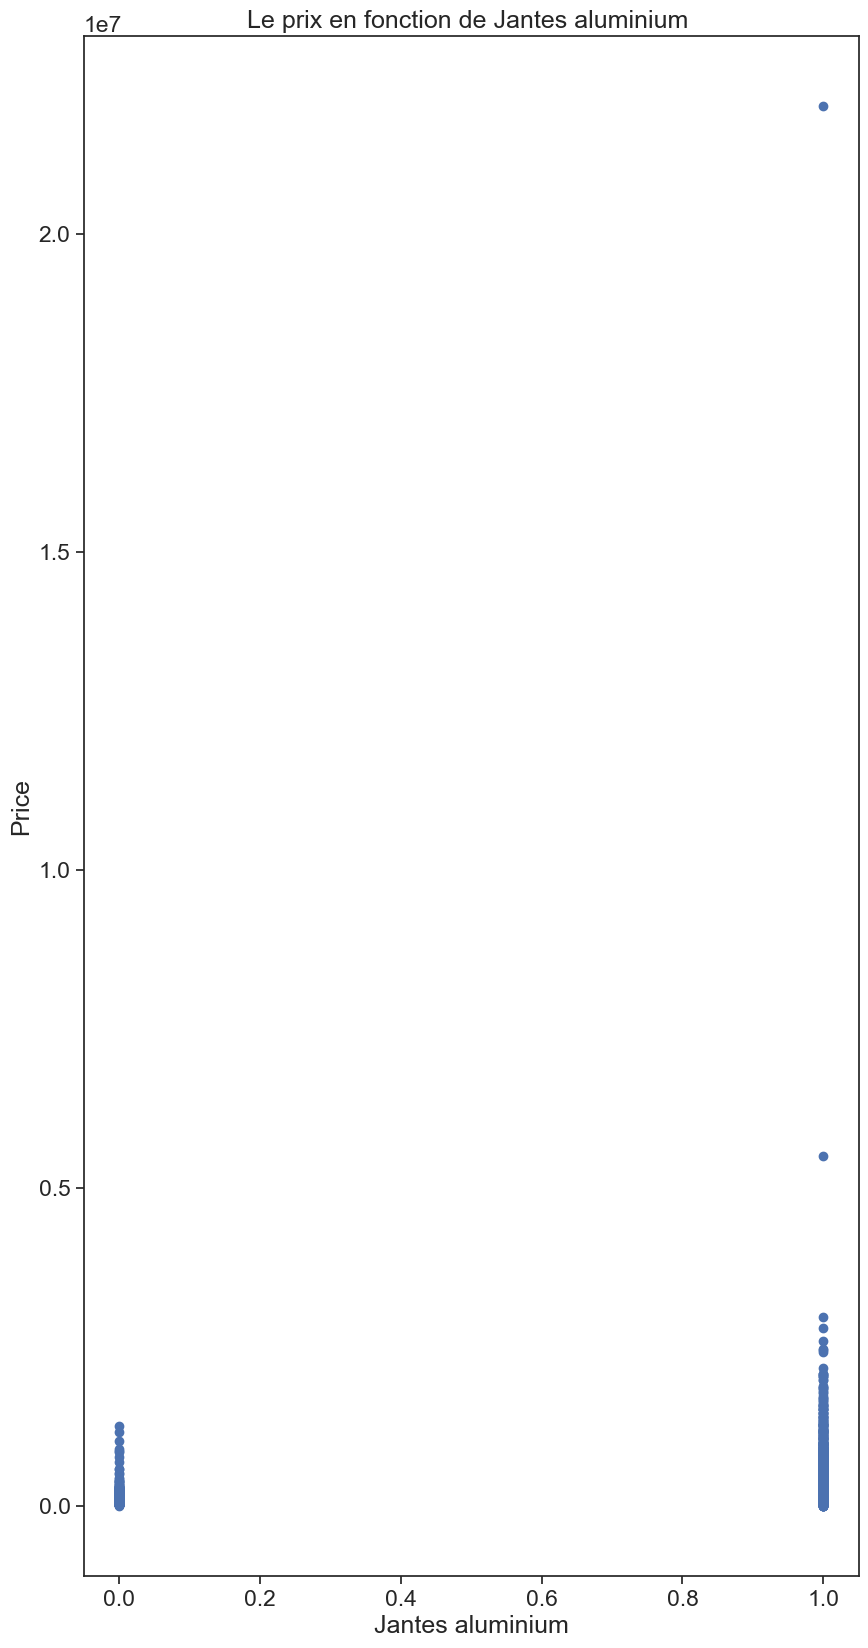

In [119]:
sns.set(style="ticks", font_scale=1.5, rc={"figure.figsize":(10, 20)})
plt.scatter(df['Jantes aluminium'], df['Price'])
plt.xlabel('Jantes aluminium')
plt.ylabel('Price')
plt.title('Le prix en fonction de Jantes aluminium ')

In [120]:
df.dtypes

Brand                                    object
Model                                    object
Version                                  object
Price                                   float64
Main                                    float64
Kilométrage                             float64
Carburant                                object
Transmision                              object
Puissance fiscale                       float64
Couleur extérieure                       object
Etat du véhicule                         object
Climatisation                            object
Vitres électriques                       object
Sièges électriques                       object
Ordinateur de bord                        int64
Start & Stop                              int64
Régulateur de vitesse                     int64
Allumage auto. des feux                   int64
Détecteur de pluie                        int64
Commandes au volant                       int64
Ecran tactile                           

In [121]:
df = pd.get_dummies(df, columns=['Brand', 'Model', 'Version','Carburant','Transmision', 'Climatisation','Vitres électriques','Sièges électriques', 'Toit','Couleur extérieure', 'Etat du véhicule'])


# Modèles de prédiction des prix

## Sur toute la dataset

In [124]:
y = df['Price']
X = df.drop(['Price'], axis=1)

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train , X_test , Y_train , Y_test = train_test_split(X , y , test_size = 0.40,random_state =2)

C:\Users\ACER\AppData\Local\Temp\ipykernel_30620\558493887.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, color ='teal')


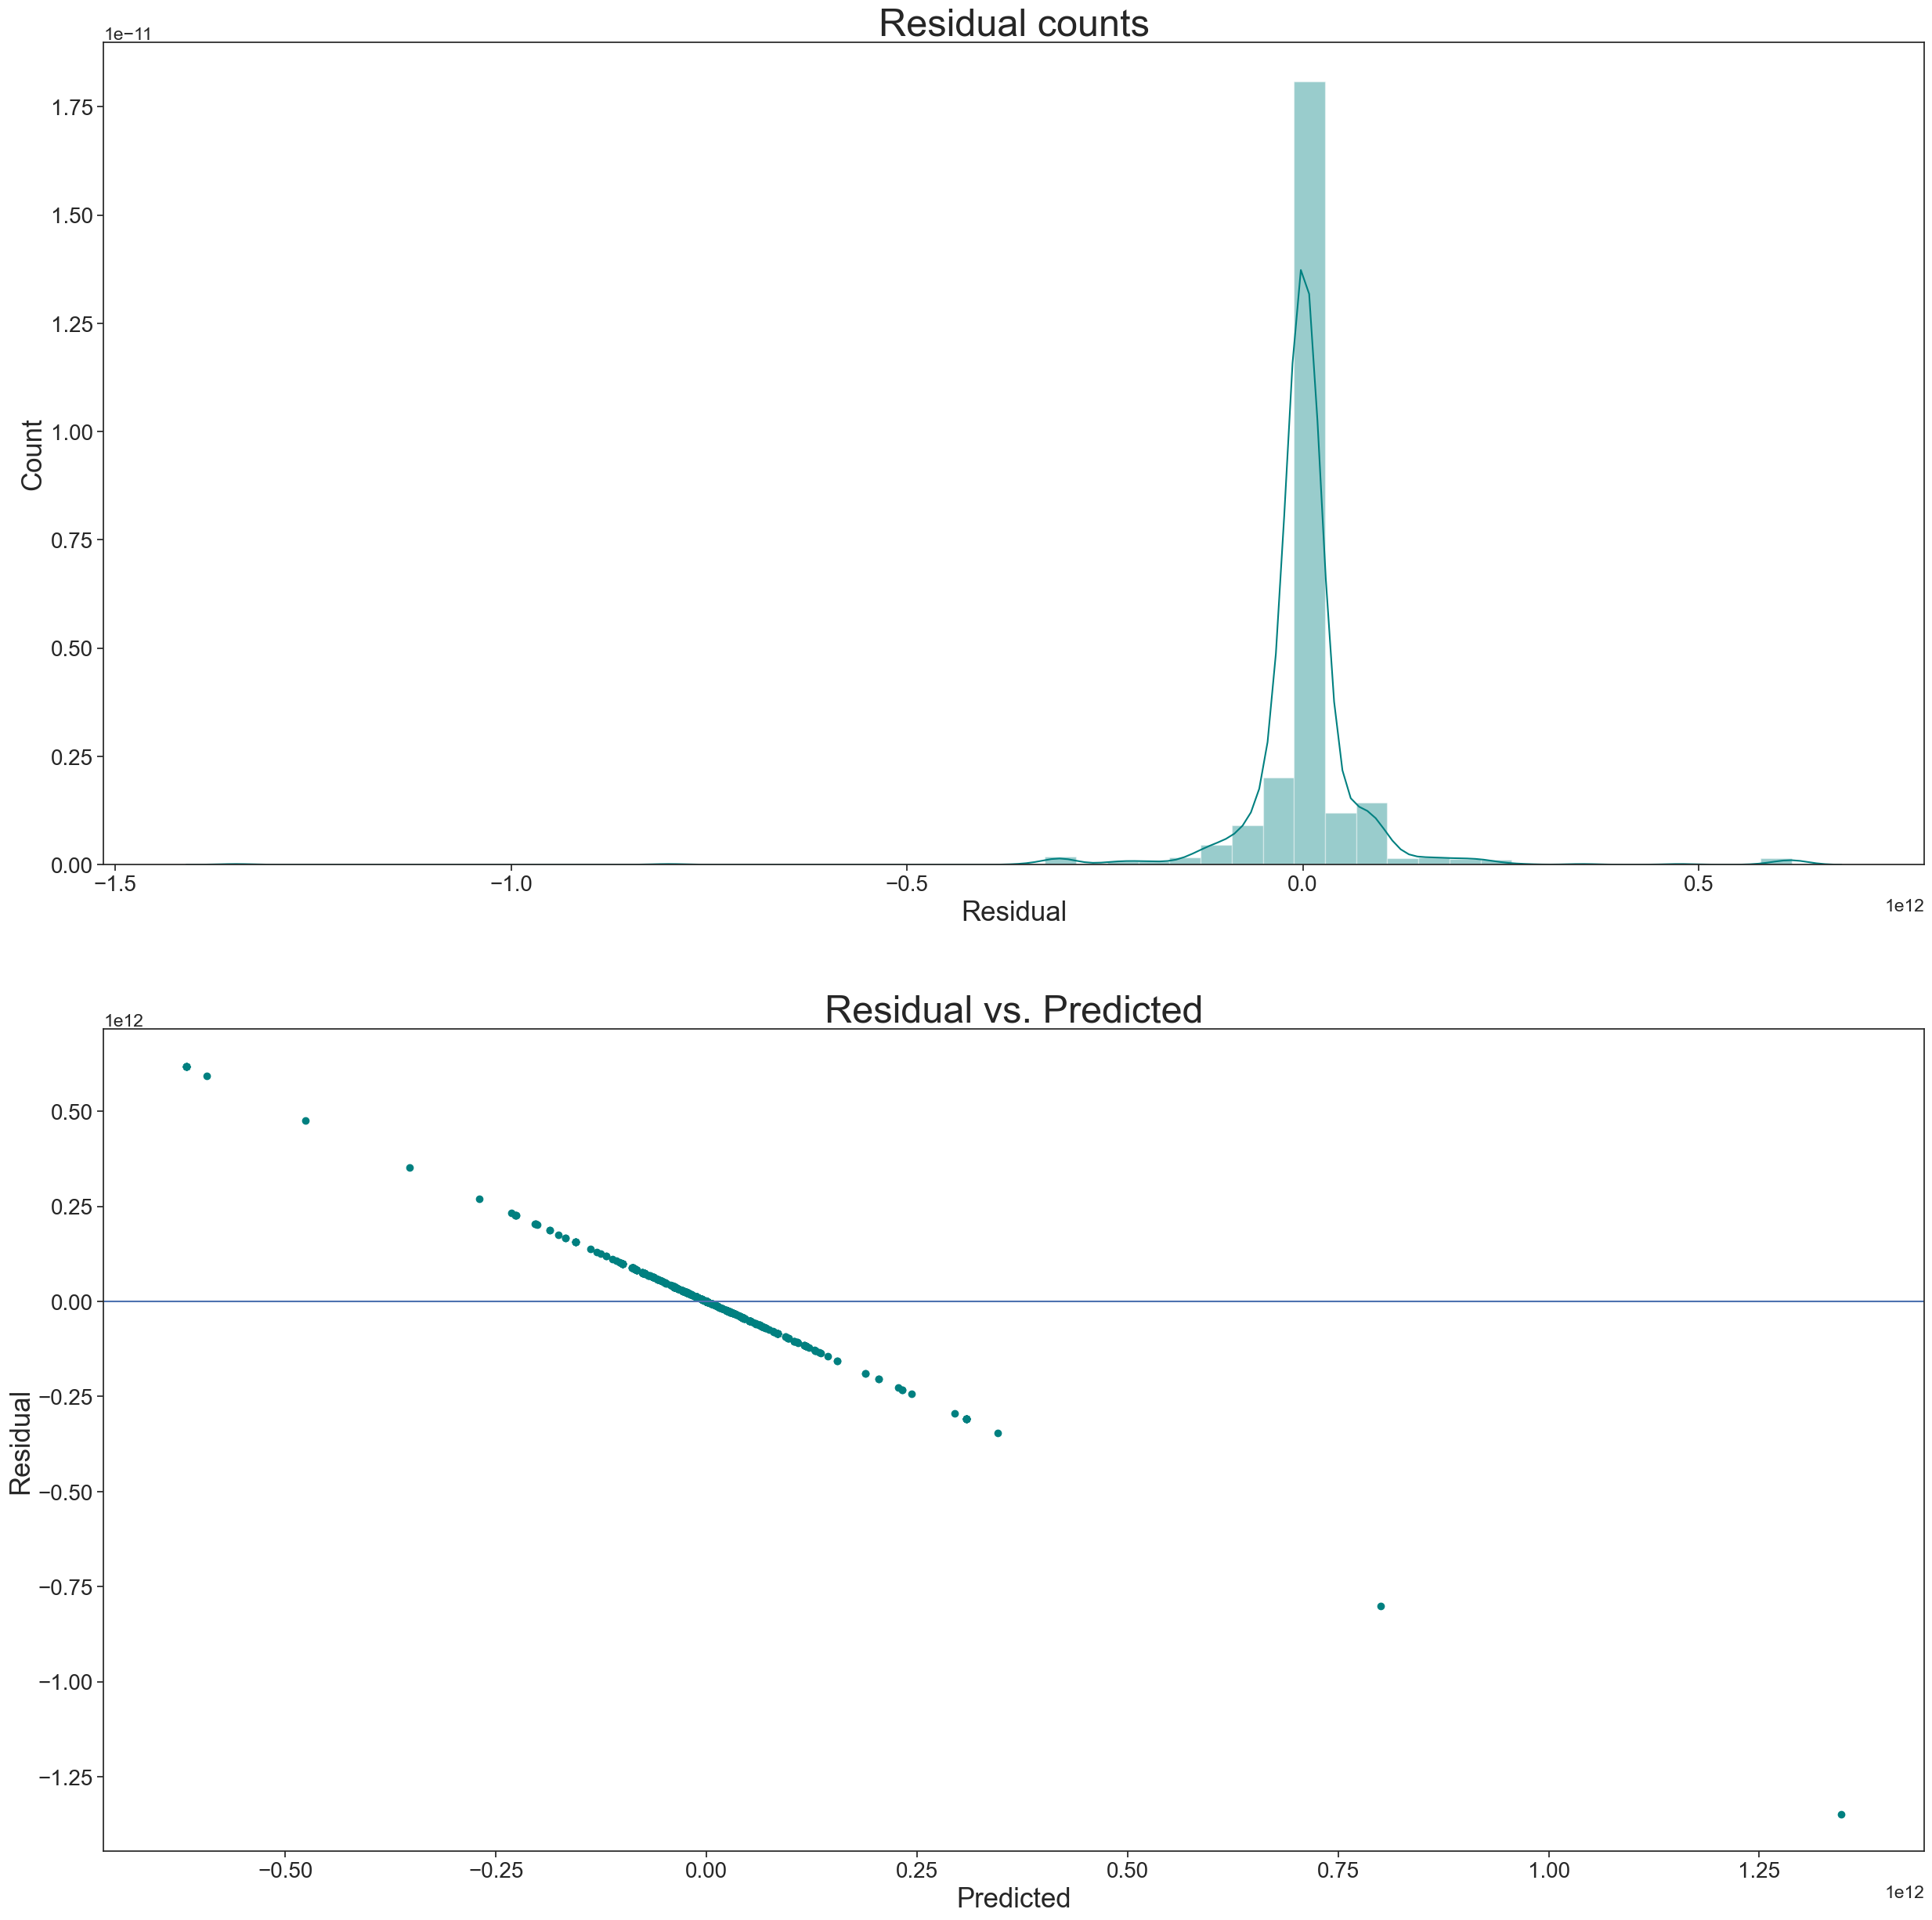

RMSE:  86363308339.81725

Mean Score:
-24042316930.79243
Variance score: -15679342477.98


In [127]:
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import cross_val_score

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

predicted = regr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
scores = cross_val_score(regr, X, y, cv=12)

print('RMSE: ',rmse)
print('\nMean Score:')
print(scores.mean())
print('Variance score: %.2f' % r2_score(Y_test, predicted))

In [128]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(Y_test, y_pred)
print("Erreur moyenne absolue :", mae)
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Erreur moyenne absolue : 96168.02057366862
Variance score: -15679342477.98


In [129]:
df

,Price,Main,Kilométrage,Puissance fiscale,Ordinateur de bord,Start & Stop,Régulateur de vitesse,Allumage auto. des feux,Détecteur de pluie,Commandes au volant,...,Couleur extérieure_Unknown,Couleur extérieure_Vert,Couleur extérieure_Vert foncé,Couleur extérieure_Violet,Etat du véhicule_Bon,Etat du véhicule_Comme neuve,Etat du véhicule_Correct,Etat du véhicule_Excellent,Etat du véhicule_Très bon,Etat du véhicule_Unknown
0,228000.0,0.0,144500.000000,8.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,79000.0,0.0,350000.000000,8.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
2,150000.0,0.0,144000.000000,8.0,1,0,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
3,135000.0,0.0,248000.000000,9.0,1,0,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
4,240000.0,0.0,103000.000000,9.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,630000.0,0.0,148795.883732,8.0,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,1
3125,730000.0,0.0,148795.883732,8.0,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,1
3126,850000.0,0.0,148795.883732,8.0,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,1
3127,1000000.0,0.0,148795.883732,11.0,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,1


In [130]:
data= df[['Price','Puissance fiscale', 'Start & Stop','Allumage auto. des feux', 'Détecteur de pluie', 'Ecran tactile', 'Démarrage mains libres','Caméra de recul','Volant cuir','Feux de jour']]

In [131]:
data

,Price,Puissance fiscale,Start & Stop,Allumage auto. des feux,Détecteur de pluie,Ecran tactile,Démarrage mains libres,Caméra de recul,Volant cuir,Feux de jour
0,228000.0,8.0,1,1,1,0,1,1,1,1
1,79000.0,8.0,1,1,1,1,0,1,0,1
2,150000.0,8.0,0,1,1,0,1,1,1,1
3,135000.0,9.0,0,1,1,0,1,0,0,1
4,240000.0,9.0,1,1,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
3124,630000.0,8.0,1,1,1,1,1,1,1,1
3125,730000.0,8.0,1,1,1,1,1,1,1,1
3126,850000.0,8.0,1,1,1,1,1,1,1,1
3127,1000000.0,11.0,1,1,1,1,1,1,1,1


## Avec features selection

In [132]:
y = data['Price']
X = data.drop(['Price'], axis=1)

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train , X_test , Y_train , Y_test = train_test_split(X , y , test_size = 0.40,random_state =2)

C:\Users\ACER\AppData\Local\Temp\ipykernel_30620\1724742171.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, color ='teal')


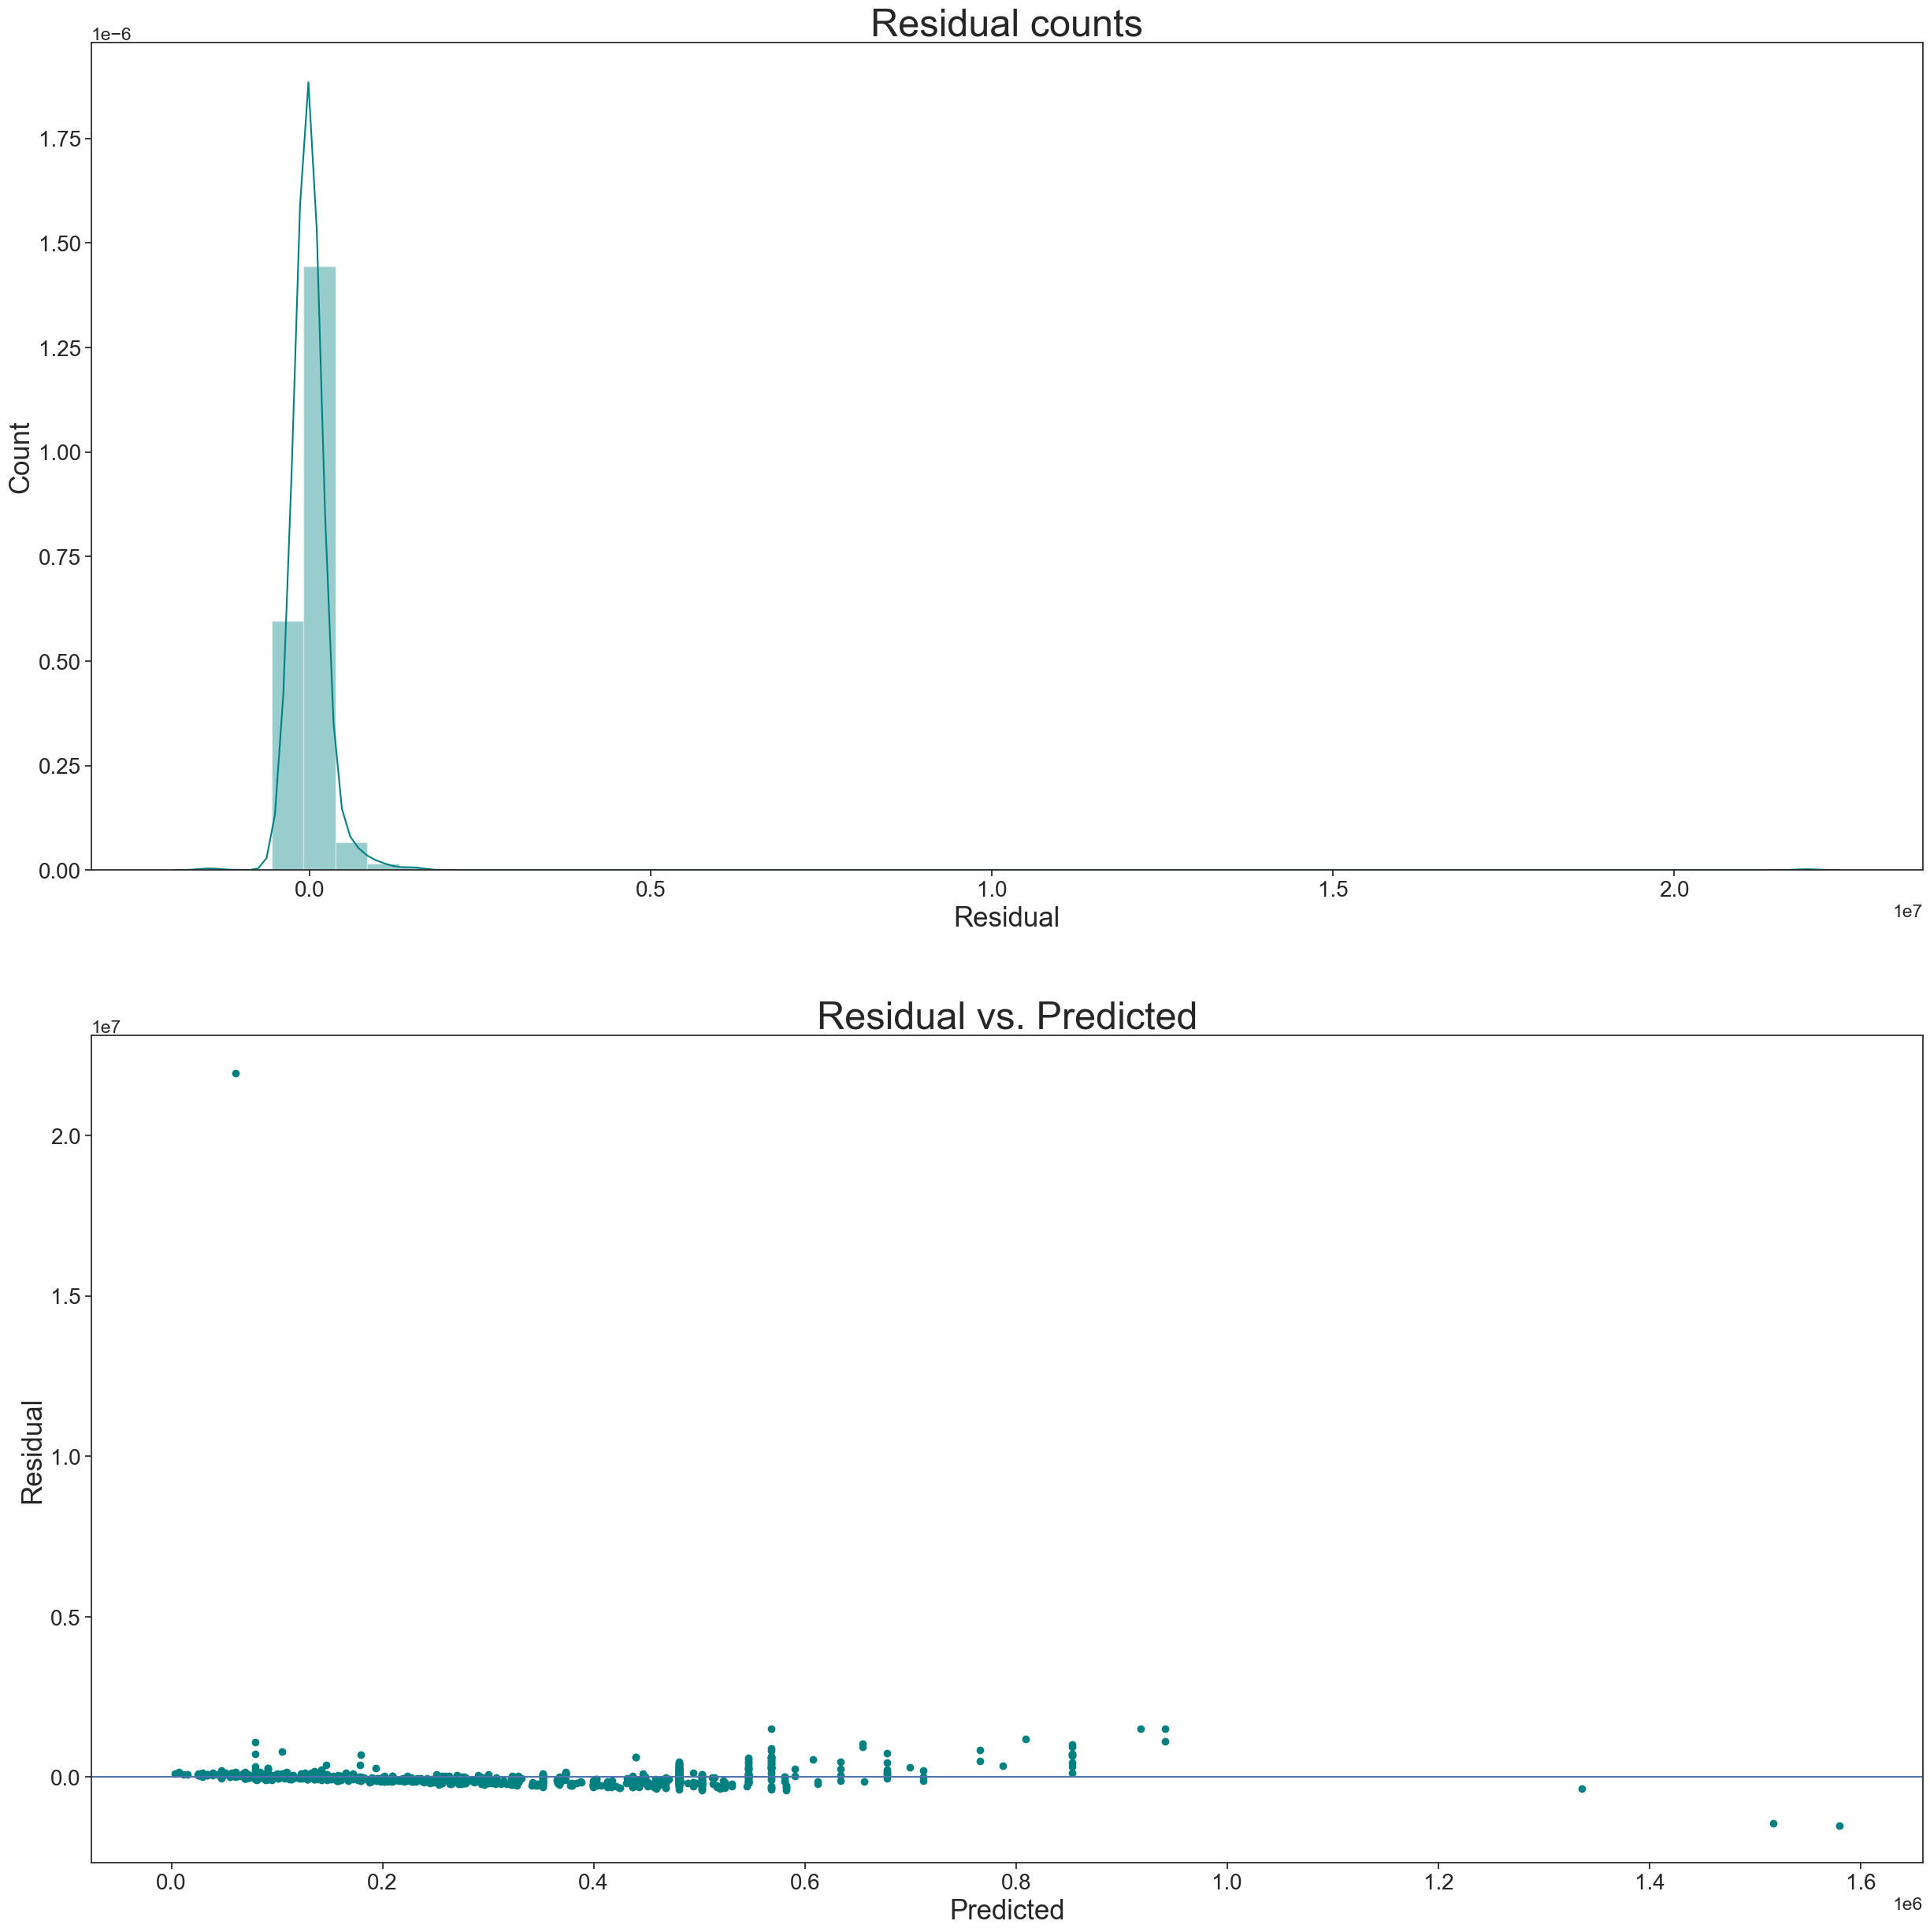

RMSE:  664443.5361172508

Mean Score:
-3.924208748714724
Variance score: 0.07


In [135]:
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import cross_val_score

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

predicted = regr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
scores = cross_val_score(regr, X, y, cv=12)


print('RMSE: ',rmse)
print('\nMean Score:')
print(scores.mean())
print('Variance score: %.2f' % r2_score(Y_test, predicted))


In [136]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(Y_test, y_pred)
print("Erreur moyenne absolue :", mae)
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Erreur moyenne absolue : 108909.74904860088
Variance score: 0.07


# Amélioration de performances:

In [137]:
data_frame= pd.read_csv('wandaloo_cars.csv')

In [138]:
data_frame.duplicated().any().any()

True

In [139]:
data_frame=data_frame.drop_duplicates()

In [140]:
data_frame.duplicated().any().any()

False

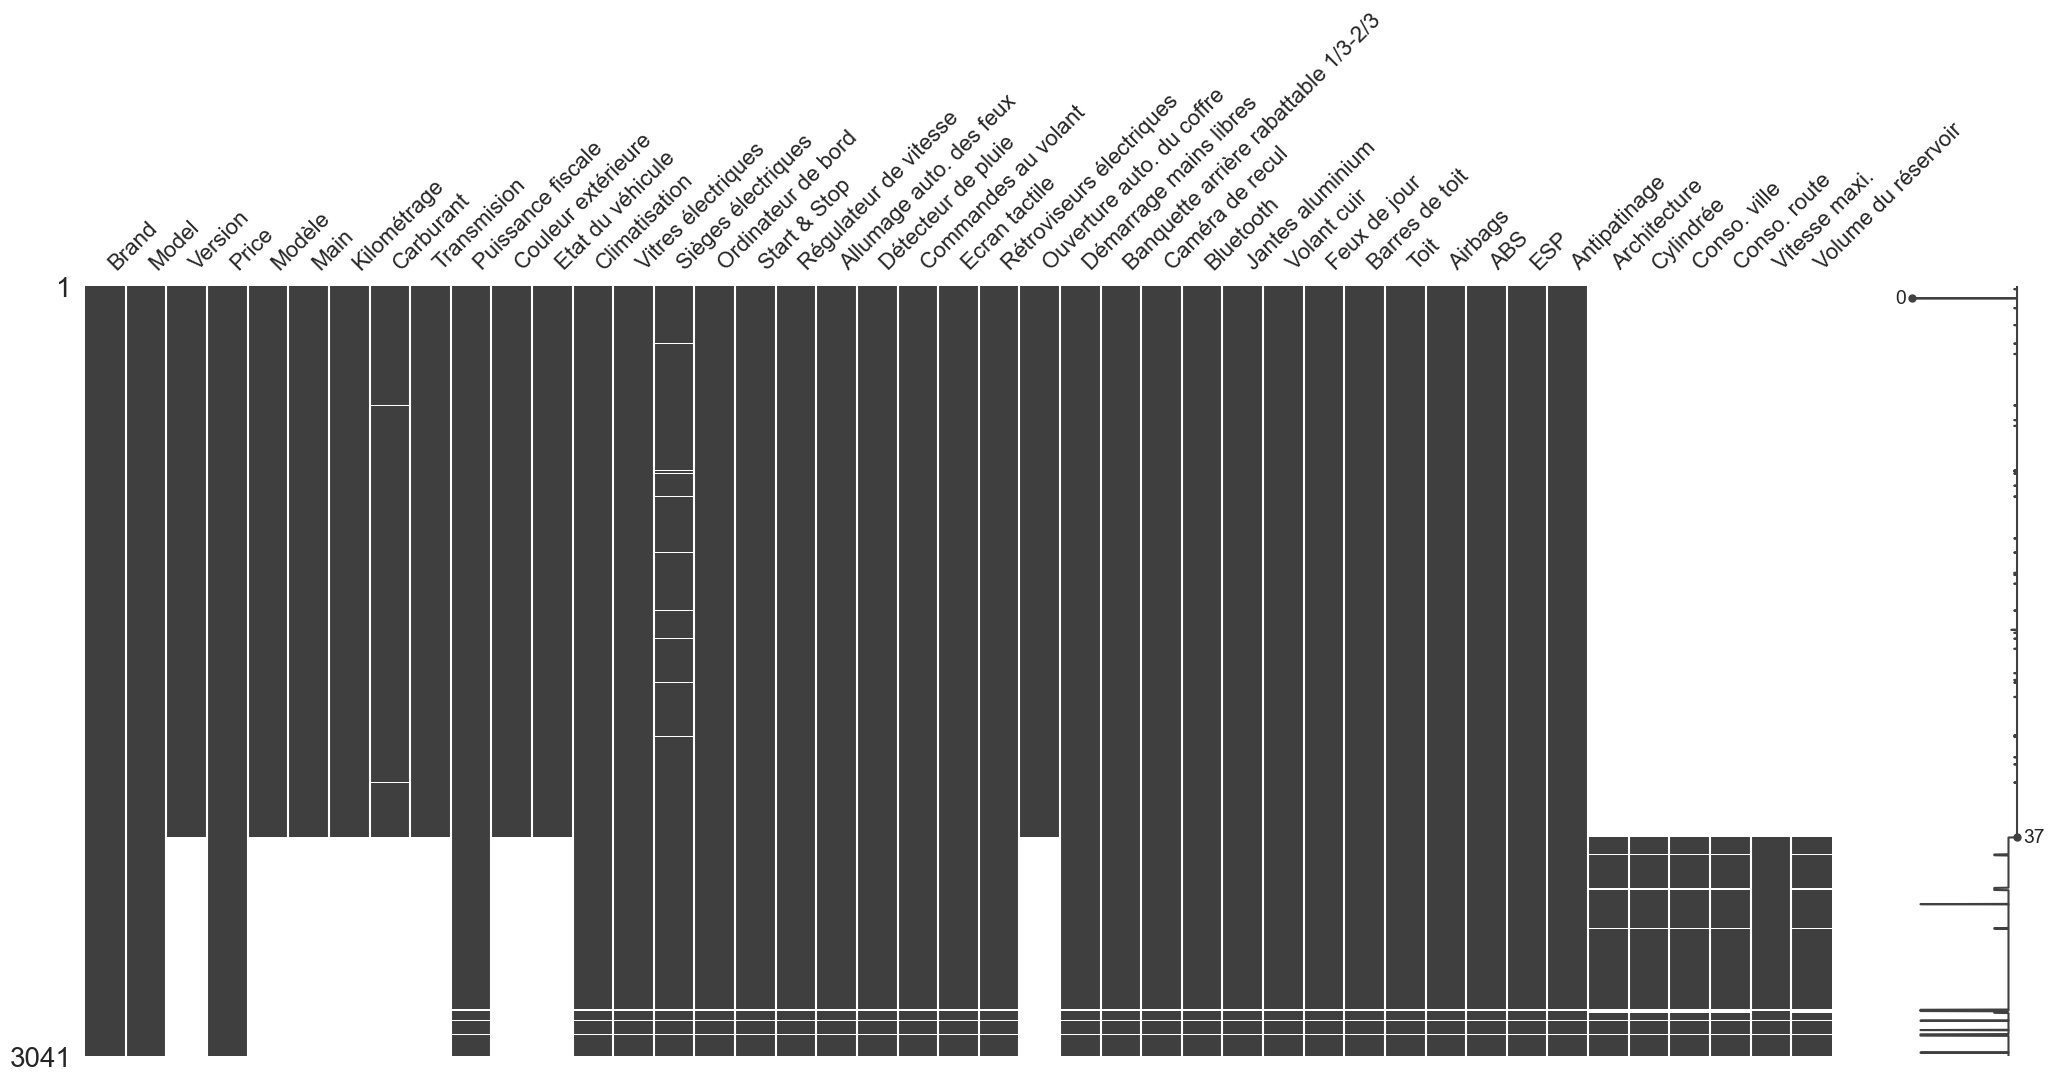

In [141]:
msno.matrix(data_frame)
plt.show()

In [142]:
cols_to_drop = ['Architecture', 'Cylindrée', 'Conso. ville', 'Conso. route', 'Vitesse maxi.', 'Volume du réservoir', 'Modèle', 'Version','Modèle','Main','Carburant','Transmision','Couleur extérieure','Etat du véhicule','Ouverture auto. du coffre','Kilométrage','Sièges électriques','Vitres électriques']
data_frame = data_frame.drop(cols_to_drop, axis=1)

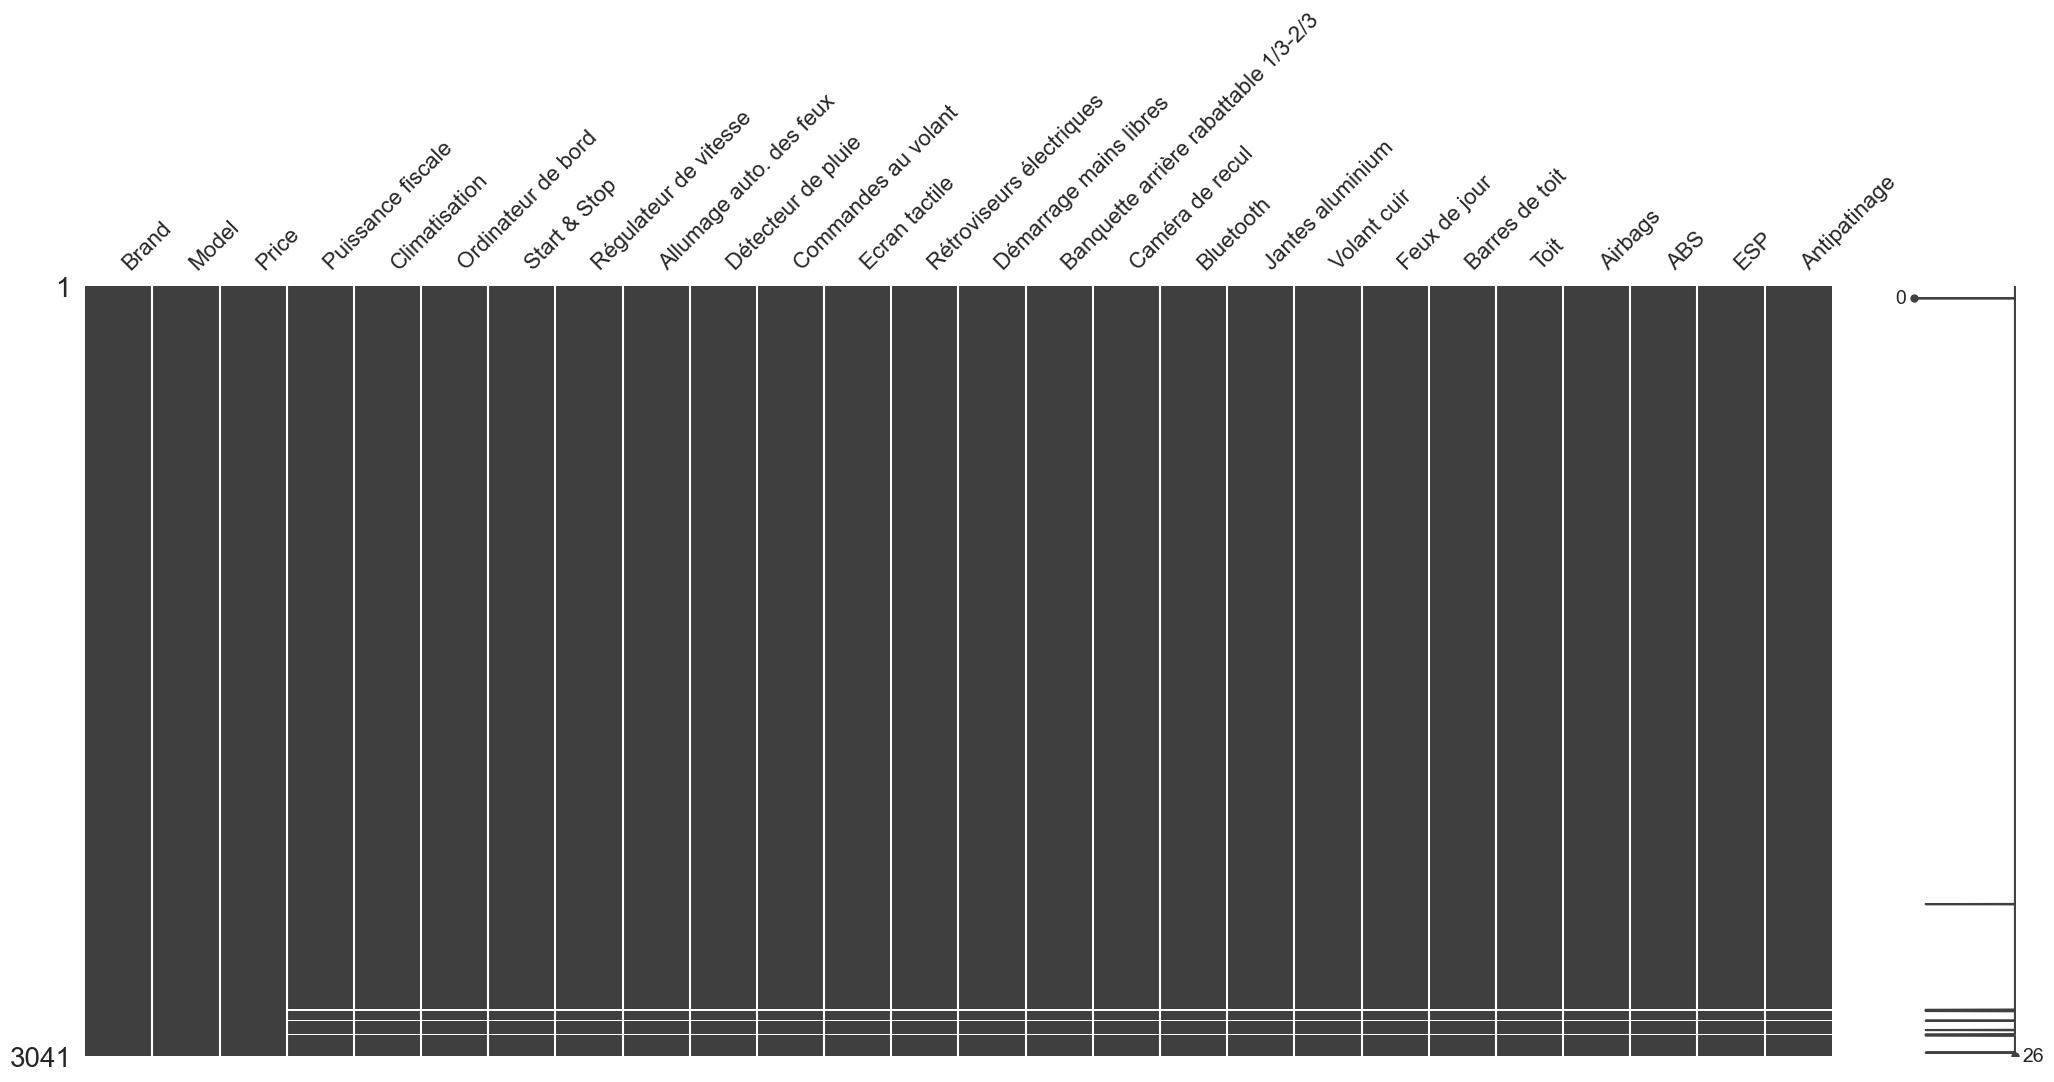

In [143]:
msno.matrix(data_frame)
plt.show()

In [144]:
index_null = data_frame[data_frame['Puissance fiscale'].isnull()].index.tolist()
index_null

[48,
 2509,
 2943,
 2944,
 2945,
 2947,
 2948,
 2986,
 3023,
 3040,
 3041,
 3042,
 3043,
 3044,
 3045,
 3114]

In [145]:
data_frame = data_frame.drop([48,
 2509,
 2943,
 2944,
 2945,
 2947,
 2948,
 2986,
 3023,
 3040,
 3041,
 3042,
 3043,
 3044,
 3045,
 3114])

In [147]:
data_frame.isnull().sum()

Brand                                   0
Model                                   0
Price                                   0
Puissance fiscale                       0
Climatisation                           0
Ordinateur de bord                      0
Start & Stop                            0
Régulateur de vitesse                   0
Allumage auto. des feux                 0
Détecteur de pluie                      0
Commandes au volant                     0
Ecran tactile                           0
Rétroviseurs électriques                0
Démarrage mains libres                  0
Banquette arrière rabattable 1/3-2/3    0
Caméra de recul                         0
Bluetooth                               0
Jantes aluminium                        0
Volant cuir                             0
Feux de jour                            0
Barres de toit                          0
Toit                                    0
Airbags                                 0
ABS                               

In [148]:
data_frame['Price'] = data_frame['Price'].str.strip("DH")
data_frame["Price"] = data_frame["Price"].replace("[^0-9\.]", "", regex=True)
data_frame["Price"] = data_frame["Price"].str.replace(".", "")
data_frame["Price"] = data_frame["Price"].astype(float)


C:\Users\ACER\AppData\Local\Temp\ipykernel_30620\4217438860.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_frame["Price"] = data_frame["Price"].str.replace(".", "")


In [149]:
data_frame['Puissance fiscale'] = data_frame['Puissance fiscale'].str.strip("cv")
data_frame['Puissance fiscale'].value_counts()


6      953
8      860
-      293
7      238
9      158
12     146
11     120
5       61
10      34
17      33
25      14
14      12
13      11
15      10
21      10
29       8
20       7
-        7
22       6
18       6
4        5
06       5
19       4
23       3
70       2
         2
24       2
81       1
37       1
08       1
3        1
95       1
75       1
2        1
26       1
85       1
47       1
1        1
16       1
07       1
73       1
27       1
Name: Puissance fiscale, dtype: int64

In [150]:
data_frame["Puissance fiscale"] = data_frame["Puissance fiscale"].str.replace("-", "0")

In [151]:
index1 = data_frame['Puissance fiscale'].index[data_frame['Puissance fiscale'] == ''][0]

In [152]:
index1

2607

In [153]:
data_frame.at[2607, 'Puissance fiscale'] = '0'

In [154]:
index2 = data_frame['Puissance fiscale'].index[data_frame['Puissance fiscale'] == ''][0]

In [155]:
index2

2608

In [156]:
data_frame.at[2608, 'Puissance fiscale'] = '0'

In [157]:
data_frame['Puissance fiscale'] = data_frame['Puissance fiscale'].astype('float')

In [158]:
data_frame['Puissance fiscale'] = data_frame['Puissance fiscale'].replace(0,df['Puissance fiscale'].mean())

In [159]:
data_frame['Climatisation'].value_counts()

auto. Bi-zone        929
manuelle             926
auto.                510
non                  406
auto. Tri-zone       141
auto. Multi-zone      59
auto. Quadri-zone     53
تلقاءي.                1
Name: Climatisation, dtype: int64

In [160]:
data_frame['Climatisation'] = data_frame['Climatisation'].replace('تلقاءي.','auto.') 
data_frame['Climatisation'] = data_frame['Climatisation'].replace('non','non connue')  

# Prediction

In [161]:
data_frame.dtypes

Brand                                    object
Model                                    object
Price                                   float64
Puissance fiscale                       float64
Climatisation                            object
Ordinateur de bord                       object
Start & Stop                             object
Régulateur de vitesse                    object
Allumage auto. des feux                  object
Détecteur de pluie                       object
Commandes au volant                      object
Ecran tactile                            object
Rétroviseurs électriques                 object
Démarrage mains libres                   object
Banquette arrière rabattable 1/3-2/3     object
Caméra de recul                          object
Bluetooth                                object
Jantes aluminium                         object
Volant cuir                              object
Feux de jour                             object
Barres de toit                          

In [162]:
data_frame_new= pd.get_dummies(data_frame)

In [163]:
y = data_frame_new['Price']
X = data_frame_new.drop(['Price'], axis=1)

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
X_train , X_test , Y_train , Y_test = train_test_split(X , y , test_size = 0.40,random_state =2)

C:\Users\ACER\AppData\Local\Temp\ipykernel_30620\558493887.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, color ='teal')


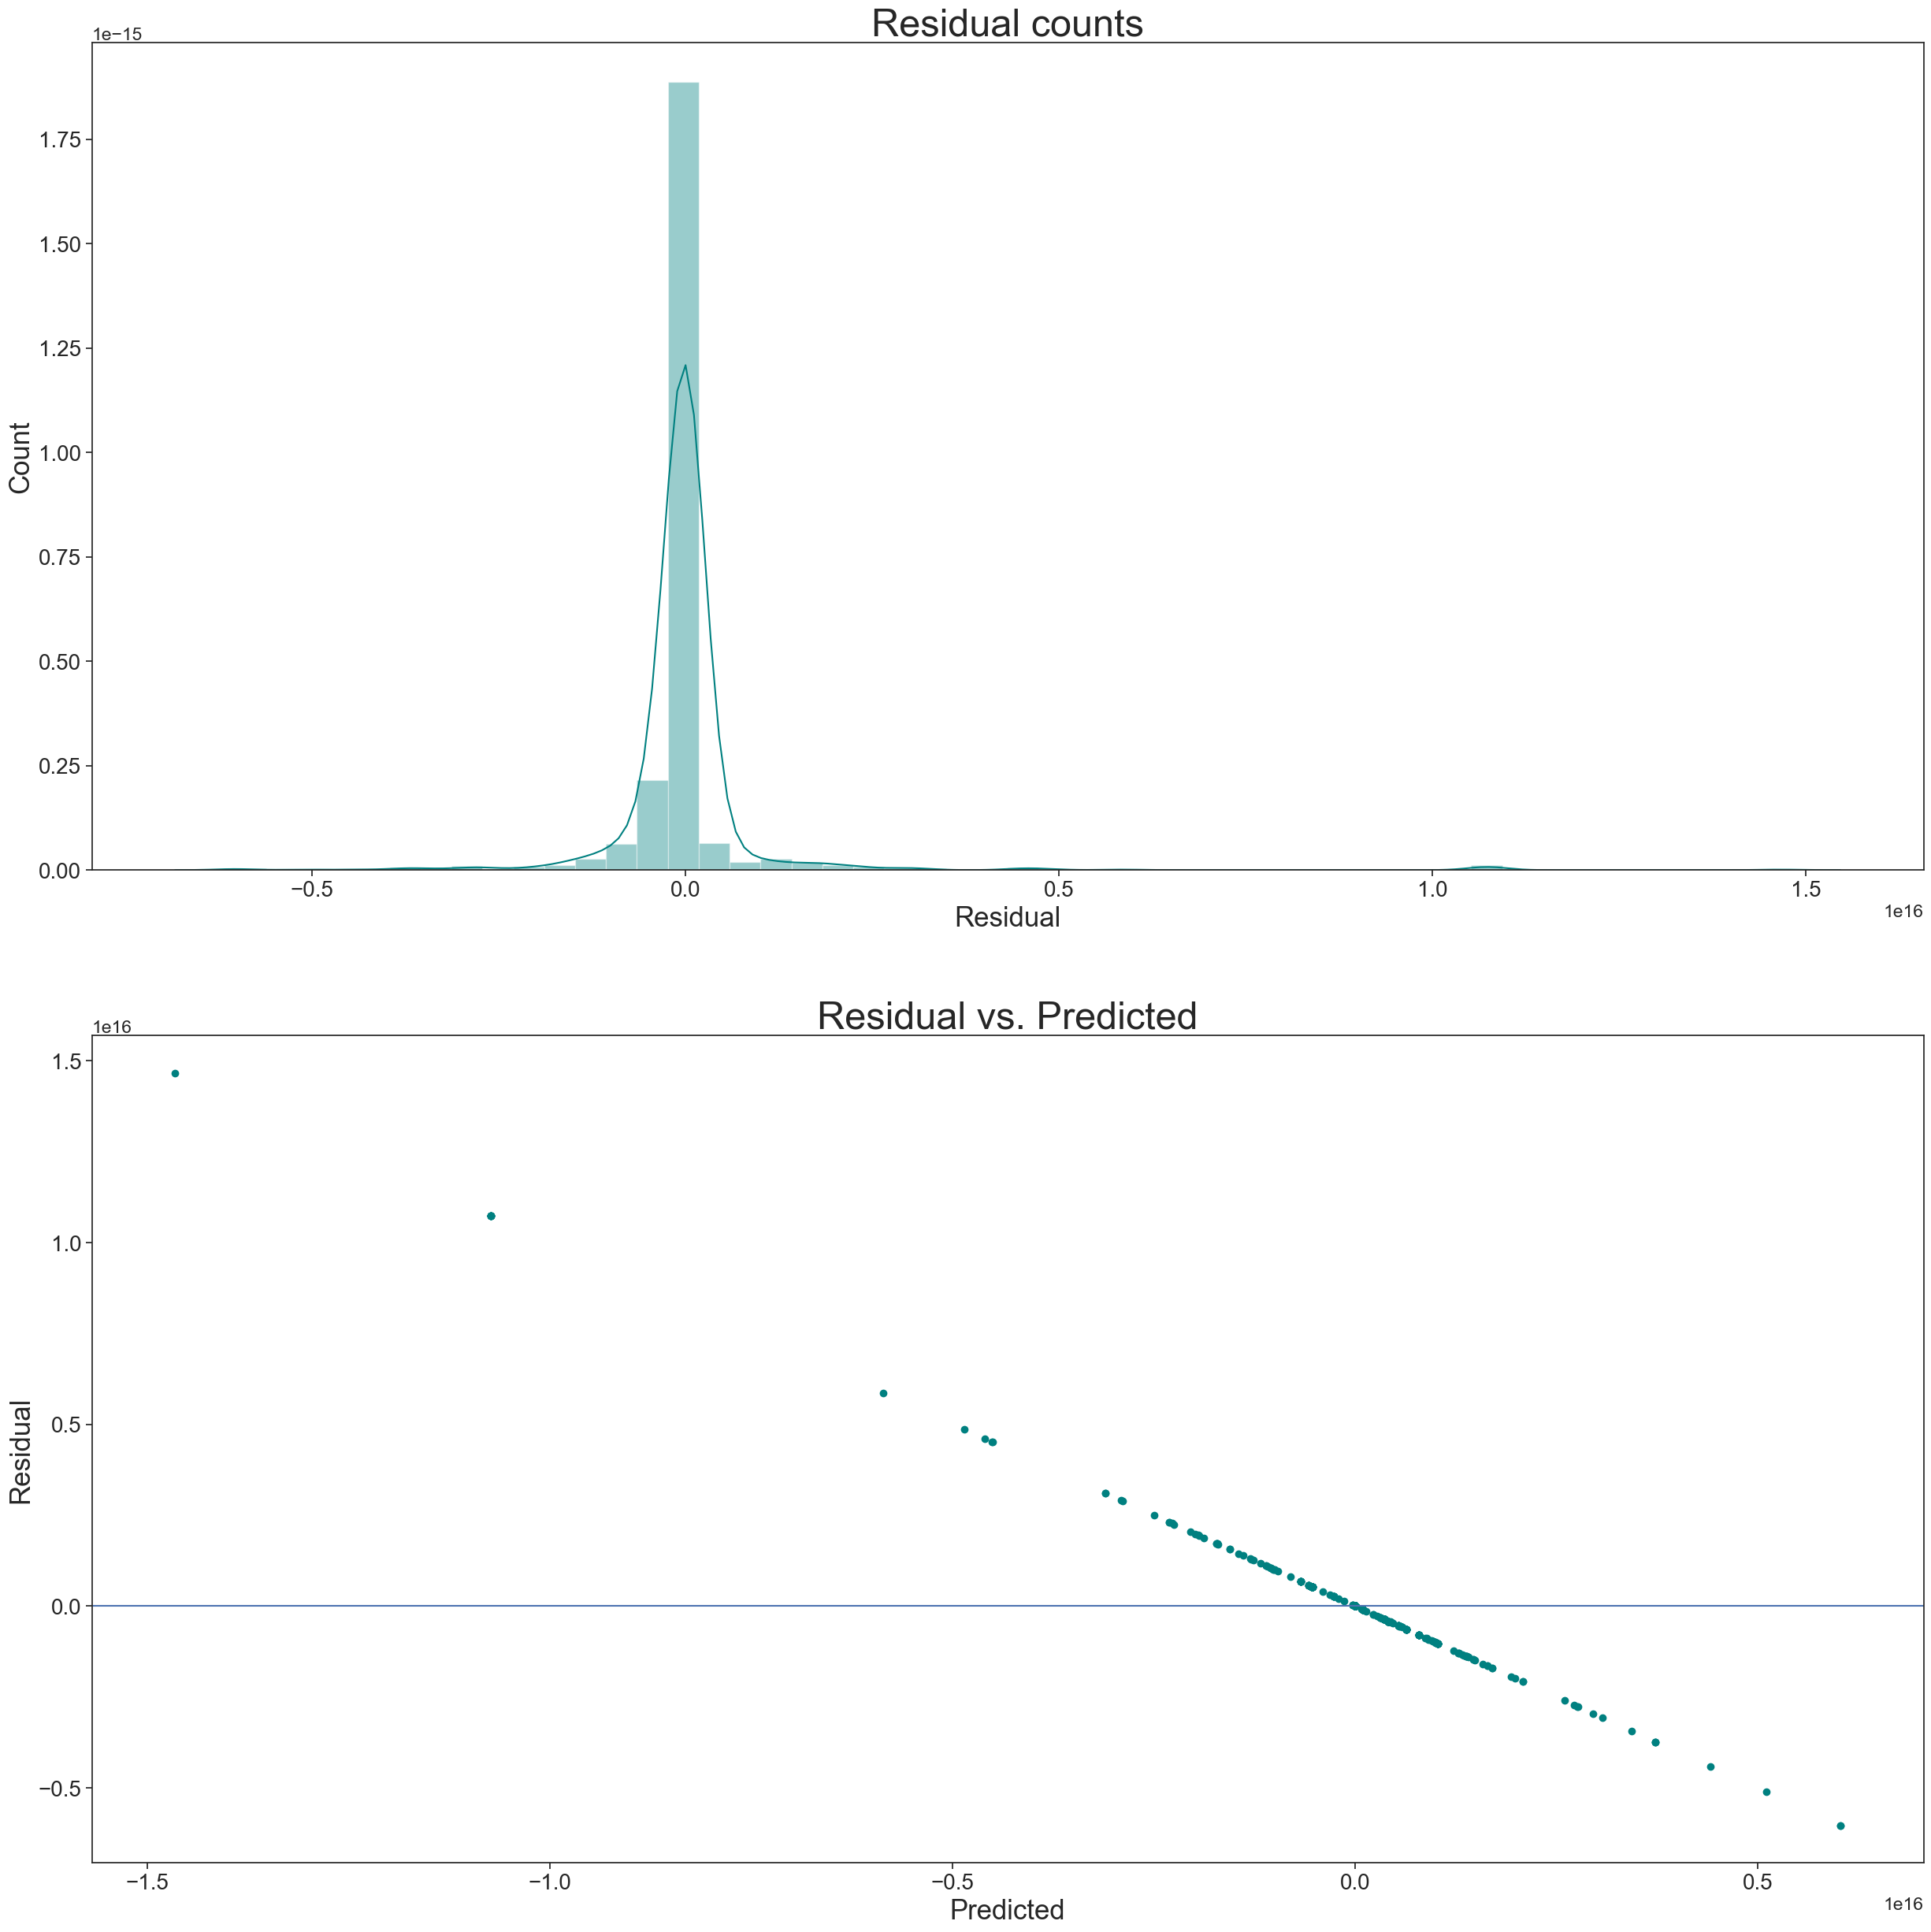

RMSE:  1108272530925891.1

Mean Score:
-7.047437860703183e+21
Variance score: -2582036894112533504.00


In [166]:
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import cross_val_score

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

predicted = regr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
scores = cross_val_score(regr, X, y, cv=12)

print('RMSE: ',rmse)
print('\nMean Score:')
print(scores.mean())
print('Variance score: %.2f' % r2_score(Y_test, predicted))

In [168]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(Y_test, y_pred)
print("Erreur moyenne absolue :", mae)
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Erreur moyenne absolue : 97480.57942654016
Variance score: -2582036894112533504.00


## Features selection

In [169]:
data_frame= data_frame[['Price','Puissance fiscale', 'Start & Stop','Allumage auto. des feux', 'Détecteur de pluie', 'Ecran tactile', 'Démarrage mains libres','Caméra de recul','Volant cuir']]

In [170]:
data_frame_New= pd.get_dummies(data_frame)

In [171]:
y = data_frame_New['Price']
X = data_frame_New.drop(['Price'], axis=1)

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
X_train , X_test , Y_train , Y_test = train_test_split(X , y , test_size = 0.40,random_state =2)

C:\Users\ACER\AppData\Local\Temp\ipykernel_30620\558493887.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, color ='teal')


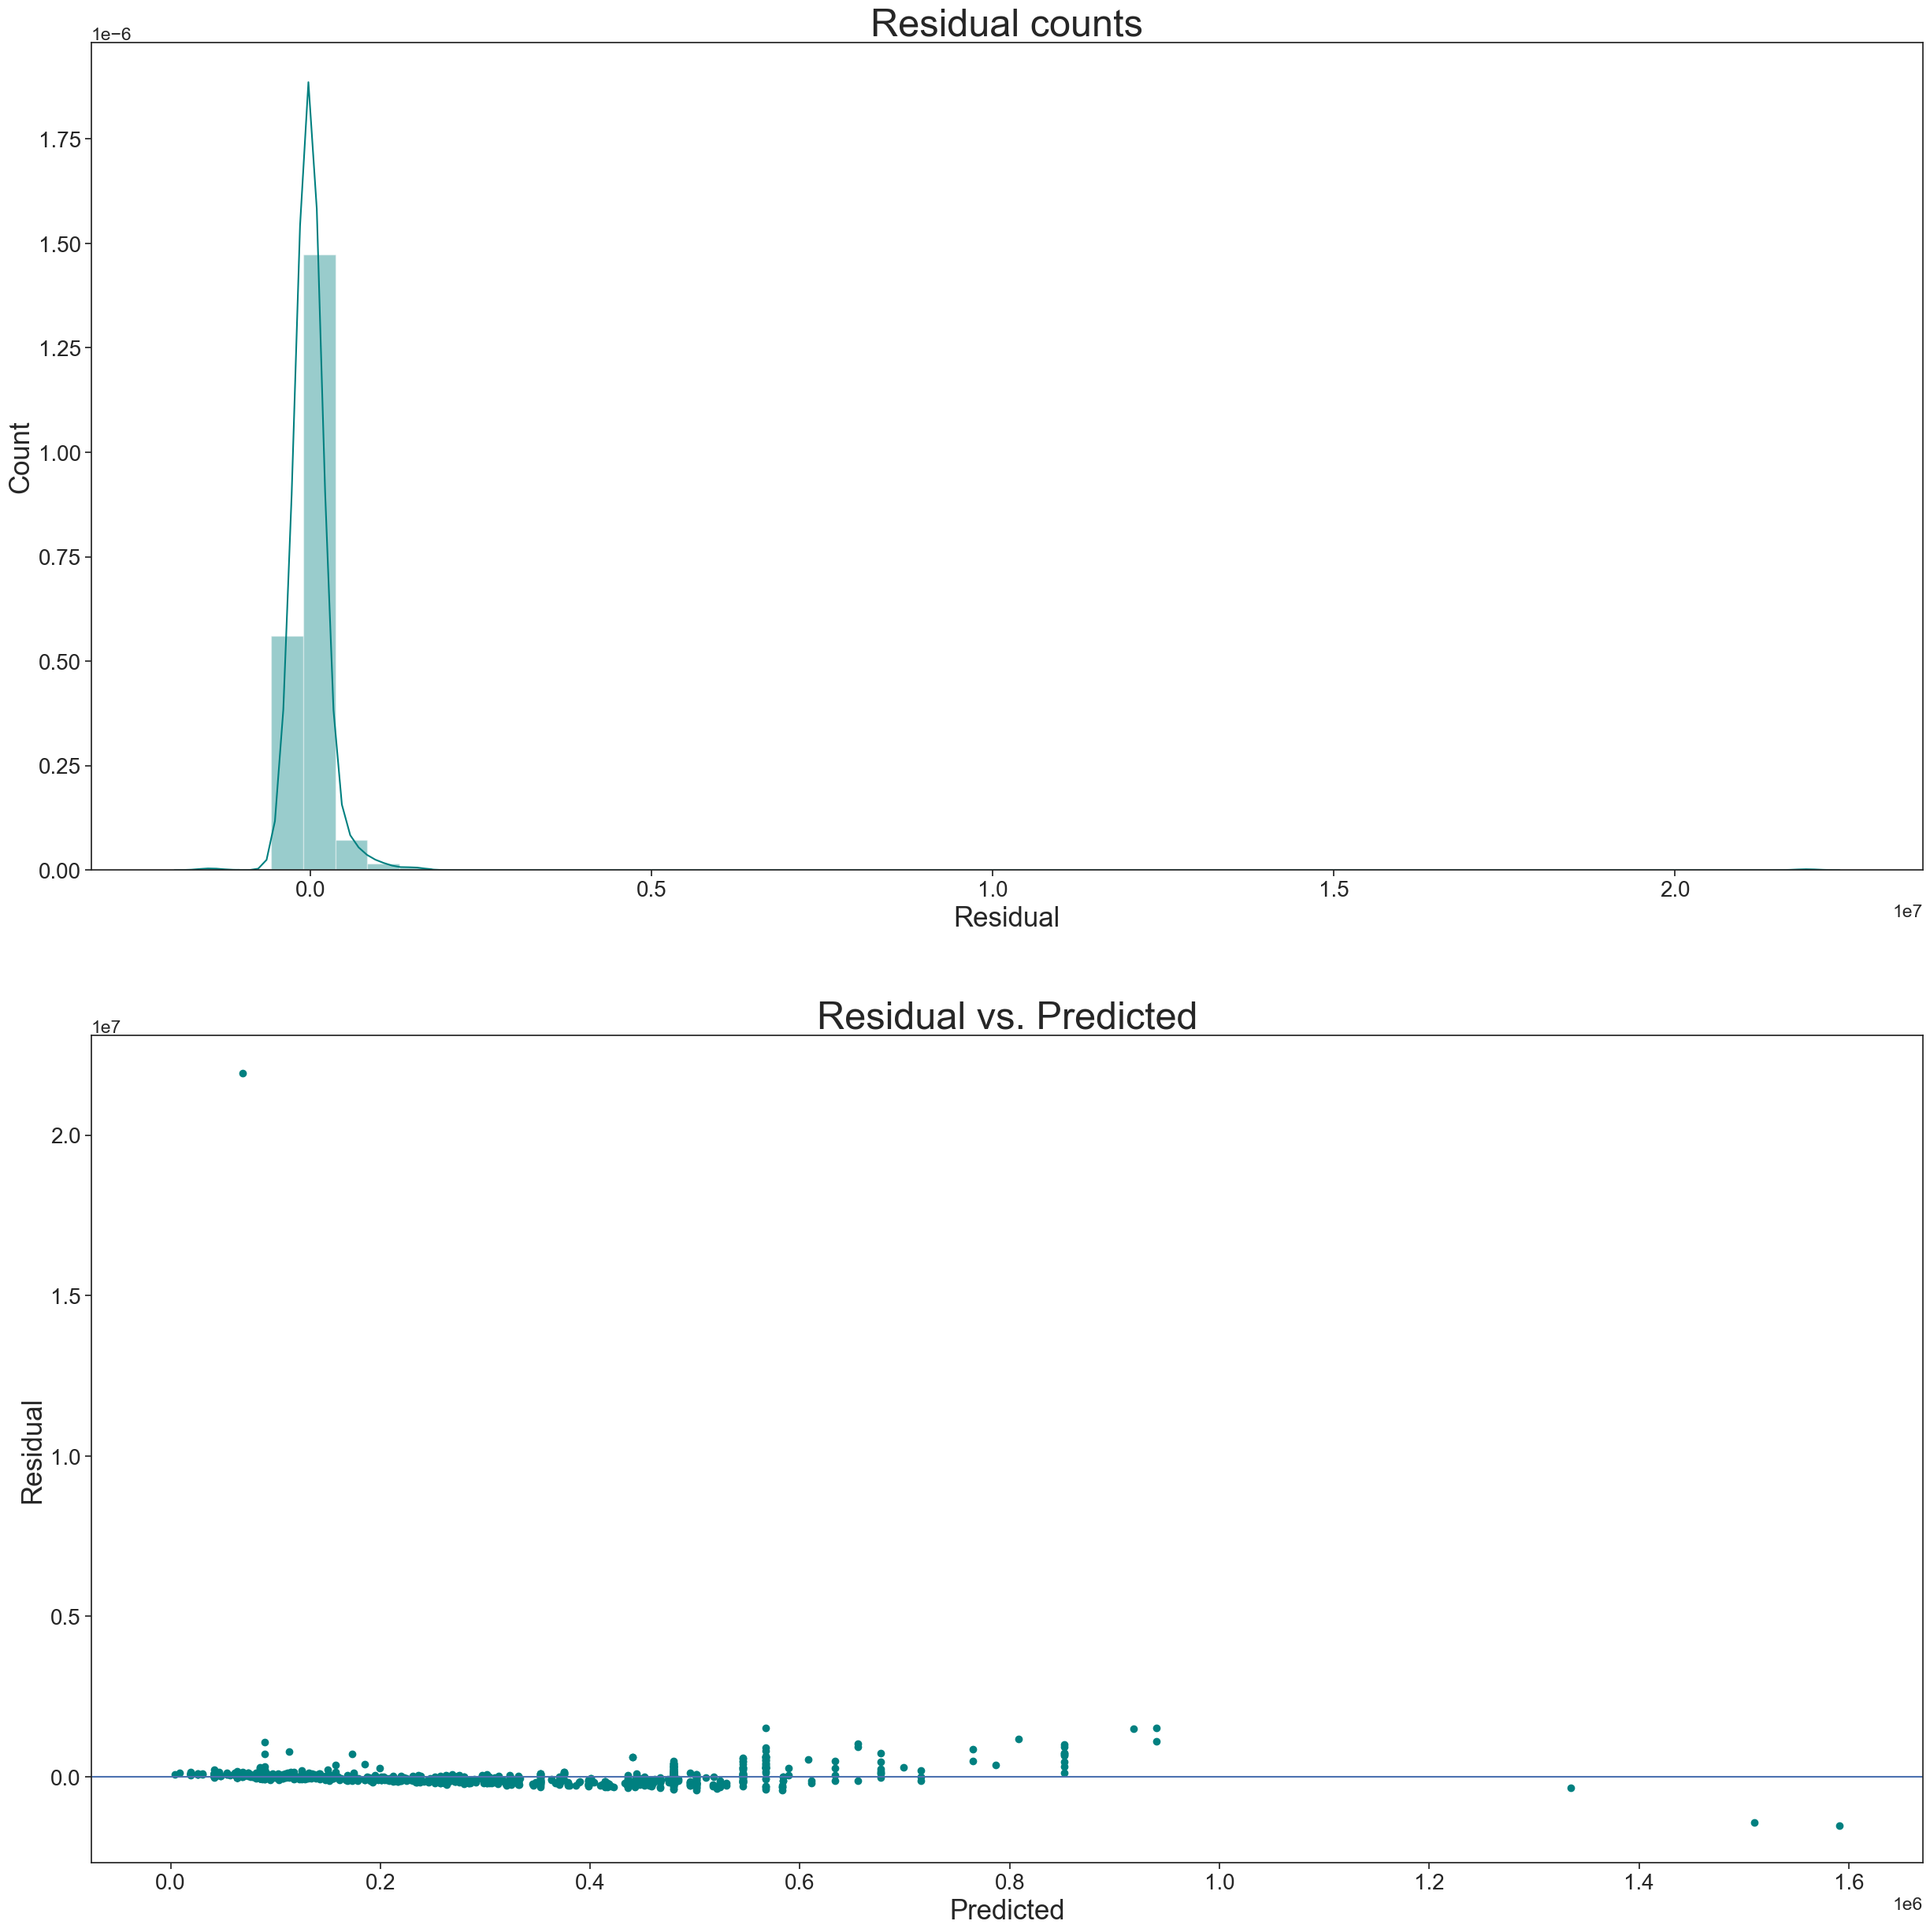

RMSE:  664197.9351011249

Mean Score:
-3.909791202475752
Variance score: 0.07


In [174]:
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import cross_val_score

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

predicted = regr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
scores = cross_val_score(regr, X, y, cv=12)

print('RMSE: ',rmse)
print('\nMean Score:')
print(scores.mean())
print('Variance score: %.2f' % r2_score(Y_test, predicted))

In [176]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(Y_test, y_pred)
print("Erreur moyenne absolue :", mae)
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Erreur moyenne absolue : 108590.08941489246
Variance score: 0.07


In [177]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [178]:
car_data = pd.get_dummies(data_frame, columns=['Start & Stop','Allumage auto. des feux', 'Détecteur de pluie', 'Ecran tactile', 'Démarrage mains libres','Caméra de recul','Volant cuir'])


In [179]:
X = car_data.drop('Price', axis=1)
y = car_data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [180]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [181]:
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
print('Variance score: %.2f' % r2_score(Y_test, predicted))

RMSE: 143830.73708071987
Variance score: 0.07


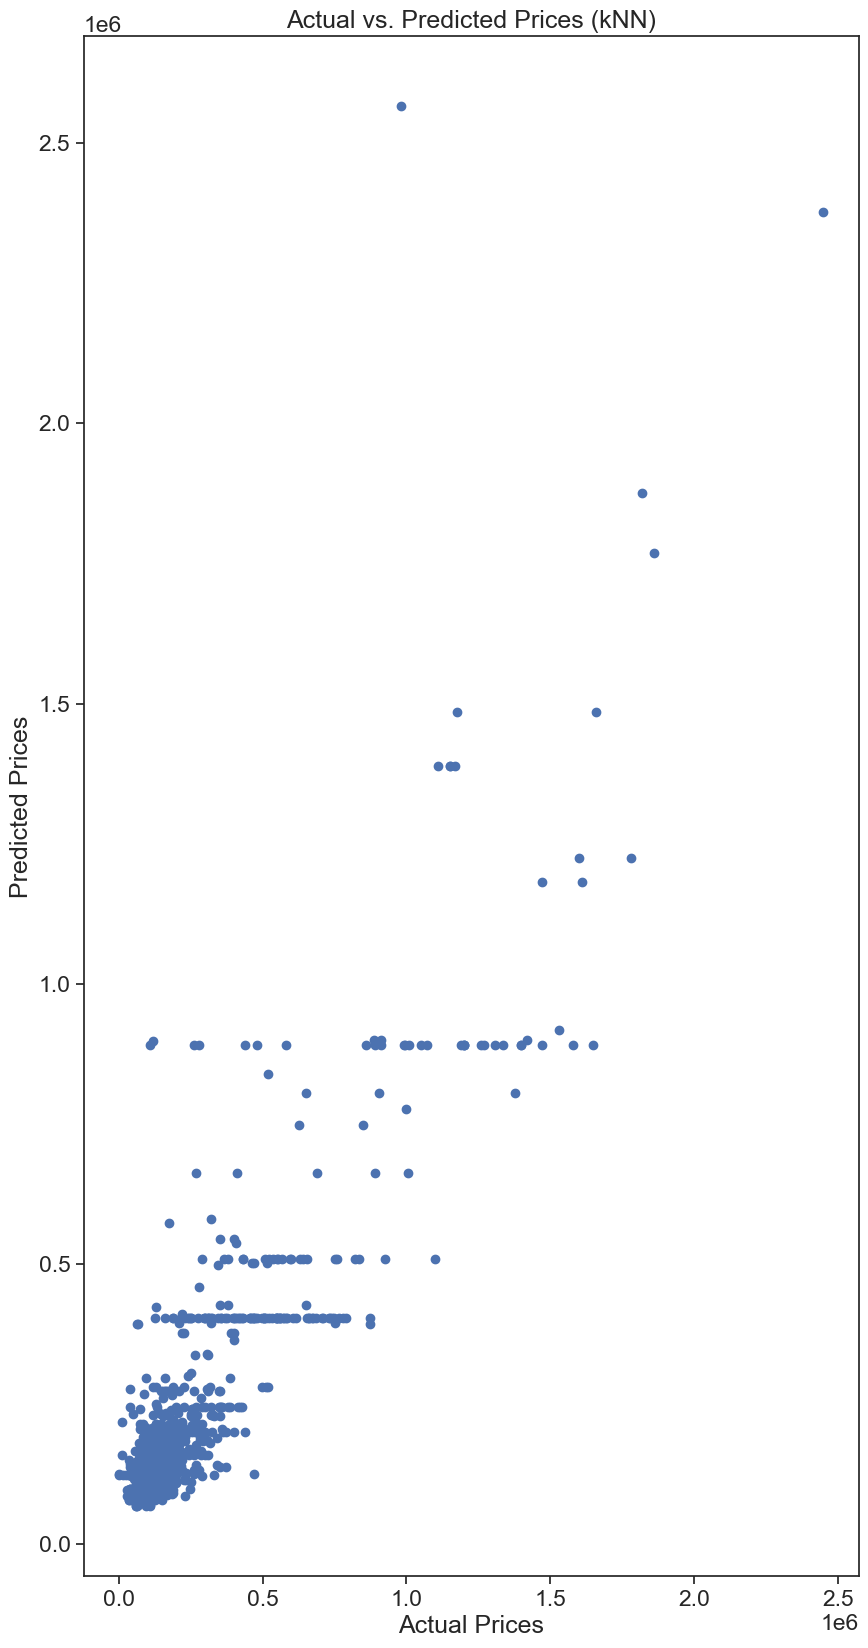

In [182]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices (kNN)")
plt.show()
